In [ ]:
import pandas as pd
import numpy as np

In [ ]:
chungchi = pd.read_excel('/content/03.sinhvien_chungchi.xlsx')
thisinh = pd.read_excel('/content/05.ThiSinh.xlsx')
xlhv = pd.read_excel('/content/08.XLHV.xlsx')
drl = pd.read_excel('/content/diemrl.xlsx')
baoluu =pd.read_excel('/content/12.baoluu.xlsx')
xeploaiav = pd.read_excel('/content/04.xeploaiav.xlsx')
dtb_toankhoa = pd.read_excel('/content/sinhvien_dtb_toankhoa.xlsx')
sv = pd.read_excel('/content/01.sinhvien.xlsx')
totnghiep = pd.read_excel('/content/14.totnghiep.xlsx')
dtb_hocky = pd.read_excel('/content/sinhvien_dtb_hocky.xlsx')
diem = pd.read_excel('/content/diem_Thu.xlsx')

In [ ]:
thisinh.head(5)

,mssv,dien_tt,diem_tt,lop12_matinh,lop12_matruong,TEN_TRUONG
0,7E308531XPvAibaEXe879+AOg1gh8i58Q/VMq7RU,THPT,24.5,53.0,32.0,THPT Bình Đông
1,0FCB6532XPvAibaEXe879+AOg1gh8o0EEQcYQ8HR,THPT,27.5,16.0,41.0,THPT Lê Xoay
2,BAF446BFXPvAibaEXe879+AOg1gh8uQrEauqA0AG,THPT,25.0,42.0,21.0,THPT Di Linh
3,599DFFB8XPvAibaEXe879+AOg1gh8lJvChSN7o+V,THPT,28.0,51.0,34.0,THPT Mỹ Hiệp
4,364B9E9BXPvAibaEXe879+AOg1gh8sRVdBmZSiXe,THPT,24.5,52.0,39.0,TTGDTX-HN Đất Đỏ (Trước 01/7/2019)


#Chuẩn bị dữ liệu

##Totnghiep

In [ ]:
#Xu ly ten cot
totnghiep.rename(columns={' xeploai': 'xeploai',
                          ' soquyetdinh': 'soquyetdinh',
                          ' ngaycapvb': 'ngaycapvb'}, inplace=True)

In [ ]:
totnghiep.loc[totnghiep['xeploai'].isin([' TB Khá', ' Trung bình Khá', ' TB khá', ' Trung bình khá']), 'xeploai'] = 'Trung bình khá'
totnghiep.loc[totnghiep['xeploai'] == " Giỏi", 'xeploai'] = "Giỏi"
totnghiep.loc[totnghiep['xeploai'] == " Xuất sắc", 'xeploai'] = "Xuất sắc"
totnghiep.loc[totnghiep['xeploai'] == " Khá", 'xeploai'] = "Khá"
totnghiep['xeploai'].value_counts()

,count
xeploai,
Khá,1125
Giỏi,447
Trung bình khá,266
Xuất sắc,7


##Diem hoc ky

In [ ]:
#điểm năm 3.5
def calculate_student_gpa_with_validation(group):

    start_year = group['namhoc'].min()


    year_1 = start_year
    year_2 = start_year + 1
    year_3 = start_year + 2
    year_4 = start_year + 3

    filtered = group[
        ((group['namhoc'] == year_4) & (group['hocky'].isin([1])))
    ]


    total_credits = filtered['sotchk'].sum()
    weighted_sum = (filtered['dtbhk'] * filtered['sotchk']).sum()
    return weighted_sum / total_credits if total_credits > 0 else None

result_3_5_years = dtb_hocky.groupby('mssv').apply(calculate_student_gpa_with_validation).reset_index()
result_3_5_years.columns = ['mssv', 'diem_3_5']

result_3_5_years

<ipython-input-5-0f2aa7988369>:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_3_5_years = dtb_hocky.groupby('mssv').apply(calculate_student_gpa_with_validation).reset_index()


,mssv,diem_3_5
0,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,NaN
1,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,8.41
2,00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD,6.92
3,0006A0BBXPvAibaEXe/lMOwHQdw54DgUkWaqwb1u,NaN
4,000AD0D8XPvAibaEXe+RQyZpP6sq6qqIPZXybx3Q,8.55
...,...,...
13603,FFE53E27XPvAibaEXe+boSxJoV2lkIPm7Byt5HdS,9.40
13604,FFE9E452XPvAibaEXe+6MN9FoW2mqXtx1lMTF9+D,7.97
13605,FFEF294AXPvAibaEXe/ceziXFRXnLc/x/K0hVw4d,7.88
13606,FFF4CD57XPvAibaEXe/z8kRiyNmKNla425pm0Qmc,NaN


In [ ]:
# Điểm từng năm
def calculate_yearly_gpa(group):
    yearly_gpa = group.groupby('namhoc').apply(
        lambda x: (x['dtbhk'] * x['sotchk']).sum() / x['sotchk'].sum()
        if x['sotchk'].sum() > 0 else 0
    ).reset_index()
    yearly_gpa.columns = ['namhoc', 'gpa_nam']
    return yearly_gpa

yearly_gpa_result = dtb_hocky.groupby('mssv').apply(calculate_yearly_gpa).reset_index(level=0)


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
<ipython-input-6-5d38be7488e7>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_gpa = group.groupby('namhoc').apply(
<ipython-input-6-5d38be7488e7>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_gpa = group.groupby('namhoc').apply(
<ipython-input-6-5d38be7488e7>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping col

In [ ]:
#Thêm cột số thứ tự năm học
yearly_gpa_result['stt_namhoc'] = yearly_gpa_result.groupby('mssv').cumcount() + 1
#Chuyển các dòng thành cột điểm năm học
yearly_gpa_result = yearly_gpa_result.pivot(index='mssv', columns='stt_namhoc', values='gpa_nam')
yearly_gpa_result.columns = [f'diemnamhoc{i}' for i in yearly_gpa_result.columns]
yearly_gpa_result

,diemnamhoc1,diemnamhoc2,diemnamhoc3,diemnamhoc4,diemnamhoc5,diemnamhoc6,diemnamhoc7,diemnamhoc8,diemnamhoc9
mssv,,,,,,,,,
0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,8.060789,7.560000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,8.928421,8.908824,8.640000,8.410000,NaN,NaN,NaN,NaN,NaN
00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD,6.315581,7.124878,7.975000,7.222500,8.2,NaN,NaN,NaN,NaN
0006A0BBXPvAibaEXe/lMOwHQdw54DgUkWaqwb1u,7.270000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000AD0D8XPvAibaEXe+RQyZpP6sq6qqIPZXybx3Q,8.736486,8.204286,7.372308,8.026000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
FFE53E27XPvAibaEXe+boSxJoV2lkIPm7Byt5HdS,8.429714,7.527750,8.030000,9.400000,NaN,NaN,NaN,NaN,NaN
FFE9E452XPvAibaEXe+6MN9FoW2mqXtx1lMTF9+D,8.176744,8.307143,7.818621,7.955882,NaN,NaN,NaN,NaN,NaN
FFEF294AXPvAibaEXe/ceziXFRXnLc/x/K0hVw4d,5.902326,7.008158,7.583514,7.756842,8.7,NaN,NaN,NaN,NaN


In [ ]:
#Merge điểm từng năm với điểm năm 3.5
diem_namhoc = yearly_gpa_result.merge(result_3_5_years, on = 'mssv', how = 'left')
diem_namhoc

,mssv,diemnamhoc1,diemnamhoc2,diemnamhoc3,diemnamhoc4,diemnamhoc5,diemnamhoc6,diemnamhoc7,diemnamhoc8,diemnamhoc9,diem_3_5
0,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,8.060789,7.560000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,8.928421,8.908824,8.640000,8.410000,NaN,NaN,NaN,NaN,NaN,8.41
2,00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD,6.315581,7.124878,7.975000,7.222500,8.2,NaN,NaN,NaN,NaN,6.92
3,0006A0BBXPvAibaEXe/lMOwHQdw54DgUkWaqwb1u,7.270000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000AD0D8XPvAibaEXe+RQyZpP6sq6qqIPZXybx3Q,8.736486,8.204286,7.372308,8.026000,NaN,NaN,NaN,NaN,NaN,8.55
...,...,...,...,...,...,...,...,...,...,...,...
13603,FFE53E27XPvAibaEXe+boSxJoV2lkIPm7Byt5HdS,8.429714,7.527750,8.030000,9.400000,NaN,NaN,NaN,NaN,NaN,9.40
13604,FFE9E452XPvAibaEXe+6MN9FoW2mqXtx1lMTF9+D,8.176744,8.307143,7.818621,7.955882,NaN,NaN,NaN,NaN,NaN,7.97
13605,FFEF294AXPvAibaEXe/ceziXFRXnLc/x/K0hVw4d,5.902326,7.008158,7.583514,7.756842,8.7,NaN,NaN,NaN,NaN,7.88
13606,FFF4CD57XPvAibaEXe/z8kRiyNmKNla425pm0Qmc,7.691905,7.450000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##sinh vien

In [ ]:
#loại bỏ các cột chứa null
for column in sv.columns:
  if sv[column].isnull().sum() > 22:
    sv.drop(column, axis=1, inplace=True)

In [ ]:
#Loại bỏ các khoảng cách dư thừa trong tên cột
sv.rename(columns={' gioitinh': 'gioitinh',
                          ' noisinh': 'noisinh',
                          ' namsinh': 'namsinh',
                          ' lopsh': 'lopsh',
                          ' khoa': 'khoa',
                          ' hedt': 'hedt',
                          ' khoahoc': 'khoahoc',
                          ' chuyennganh2': 'chuyennganh2',
                          ' tinhtrang': 'tinhtrang',
                          ' diachi_tinhtp': 'diachi_tinhtp'}, inplace=True)

##Drl

In [ ]:
#Điểm rèn luyện 3.5
def calculate_student_drl_with_validation(group):

    start_year = group['namhoc'].min()


    year_1 = start_year
    year_2 = start_year + 1
    year_3 = start_year + 2
    year_4 = start_year + 3

    filtered = group[
        ((group['namhoc'] == year_4) & (group['hocky'].isin([1])))
    ]

    return filtered['drl'].iloc[0] if not filtered.empty else None

drl_3_5_years = drl.groupby('mssv').apply(calculate_student_drl_with_validation).reset_index()
drl_3_5_years.columns = ['mssv', 'drl_3_5']

drl_3_5_years

<ipython-input-16-0859dff89804>:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  drl_3_5_years = drl.groupby('mssv').apply(calculate_student_drl_with_validation).reset_index()


,mssv,drl_3_5
0,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,NaN
1,0001CF3EXPvAibaEXe/xTpnJlY3K6L35F+TKUux6,NaN
2,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,100.0
3,00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD,64.0
4,0006A0BBXPvAibaEXe/lMOwHQdw54DgUkWaqwb1u,NaN
...,...,...
17977,FFE9E452XPvAibaEXe+6MN9FoW2mqXtx1lMTF9+D,73.0
17978,FFEF294AXPvAibaEXe/ceziXFRXnLc/x/K0hVw4d,79.0
17979,FFF3D630XPvAibaEXe8byJxgVsE7R2dP7ICEdFWK,90.0
17980,FFF4CD57XPvAibaEXe/z8kRiyNmKNla425pm0Qmc,NaN


In [ ]:
#Tính điểm rèn luyện theo từng năm
#Gom các dòng có cùng mssv và năm học và tính trung bình
drl_theonam = drl.groupby(['mssv', 'namhoc']).agg({'drl': 'mean'}).reset_index()
#Sắp xếp lại dựa trên năm học
drl_theonam = drl_theonam.sort_values(by=['mssv', 'namhoc'])
#Thêm cột số thự tự năm học
drl_theonam['stt_namhoc'] = drl_theonam.groupby('mssv').cumcount() + 1
#Chuyển các dòng thành cột đrl theo năm
drl_theonam = drl_theonam.pivot(index='mssv', columns='stt_namhoc', values='drl')
#Đặt lại tên cột
drl_theonam.columns = [f'drlnam{i}' for i in drl_theonam.columns]
#Merge với đrl 3.5
drl_theonam = pd.merge(drl_theonam,drl_3_5_years,on='mssv',how= 'left')
drl_theonam

,mssv,drlnam1,drlnam2,drlnam3,drlnam4,drlnam5,drlnam6,drlnam7,drlnam8,drl_3_5
0,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,91.5,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0001CF3EXPvAibaEXe/xTpnJlY3K6L35F+TKUux6,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,100.0,100.0,100.0,100.0,NaN,NaN,NaN,NaN,100.0
3,00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD,78.5,83.0,74.0,67.0,73.0,NaN,NaN,NaN,64.0
4,0006A0BBXPvAibaEXe/lMOwHQdw54DgUkWaqwb1u,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
17977,FFE9E452XPvAibaEXe+6MN9FoW2mqXtx1lMTF9+D,98.0,90.0,88.5,74.5,NaN,NaN,NaN,NaN,73.0
17978,FFEF294AXPvAibaEXe/ceziXFRXnLc/x/K0hVw4d,78.0,75.5,76.5,76.5,81.0,NaN,NaN,NaN,79.0
17979,FFF3D630XPvAibaEXe8byJxgVsE7R2dP7ICEdFWK,70.0,85.0,99.0,84.5,NaN,NaN,NaN,NaN,90.0
17980,FFF4CD57XPvAibaEXe/z8kRiyNmKNla425pm0Qmc,91.5,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Tín chỉ

###Tín chỉ tích lũy cho từng năm

In [ ]:
tc_tichluy = diem.copy()
#Lấy điểm môn học cao nhất
tc_tichluy = tc_tichluy.sort_values(by=['diem_hp'], ascending=False)
# 1 là các môn đã qua, 3 là môn cải thiện
tc_tichluy = tc_tichluy[tc_tichluy['trangthai'].isin([1,3])]
#Do đã sort theo điểm học phần nên giữ lại điểm môn học cao nhất
tc_tichluy = tc_tichluy.drop_duplicates(subset=['mssv','mamh'], keep='first')
tc_tichluy

,mssv,mamh,malop,sotc,hocky,namhoc,diem_qt,diem_th,diem_gk,diem_ck,diem_hp,trangthai,tinhtrang,mamh_tt
113968,965D73DEXPvAibaEXe8HdBWz7TQU69eSslANH4ip,PEDU1,PEDU1.C14,0,1,2011,NaN,NaN,NaN,NaN,12.0,1,0,NaN
115238,5856355FXPvAibaEXe/n+mfOnlSouD8XHPjkdWEi,PEDU1,PEDU1.C11,0,1,2011,NaN,NaN,NaN,NaN,12.0,1,0,NaN
116377,62050111XPvAibaEXe/1bsgFpjh4AypIMbkg1TOb,PEDU1,PEDU1.C14,0,1,2011,NaN,NaN,NaN,NaN,12.0,1,0,NaN
111490,FE620339XPvAibaEXe9B4DABGWTuPYI3rVKFo7VD,PEDU1,PEDU1.C13,0,1,2011,NaN,NaN,NaN,NaN,12.0,1,0,NaN
99913,FAD82DDFXPvAibaEXe+uRfOPQ+iOmdZep8AuuwsV,PEDU1,PEDU1.B13,0,1,2010,NaN,NaN,NaN,NaN,12.0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662532,3DF60F05XPvAibaEXe/9LBBkdbcCWKovwcgQ4mjo,SS003,SS003.N11,2,1,2022,NaN,NaN,NaN,0.0,NaN,1,-1,NaN
664836,84F1726EXPvAibaEXe/FejQN8/S5fHF/hPdc4T81,NT215,NT215.N11,0,1,2022,NaN,NaN,NaN,NaN,NaN,1,-1,NaN
668560,0F95BF11XPvAibaEXe85pnNqK7QfqrW38OxsyfdO,SS004,SS004.N11.CLC,0,1,2022,NaN,NaN,NaN,NaN,NaN,1,-1,NaN
669224,2E197B0CXPvAibaEXe8cSwcDAK/pUCSeCgTsw7y9,SE400,SE400.N12.PMCL,0,1,2022,NaN,NaN,NaN,NaN,NaN,1,-1,NaN


In [ ]:
#Tín chỉ tích lũy năm 3.5
def calculate_student_tinchi_with_validation(group):

    start_year = group['namhoc'].min()

    start_year = np.sort(group['namhoc'].unique())
    if len(start_year) >= 4:
      year_1 = start_year[0]
      year_2 = start_year[1]
      year_3 = start_year[2]
      year_4 = start_year[3]

      filtered = group[
          ((group['namhoc'] == year_4) & (group['hocky'].isin([1])))
      ]

      total_credits = filtered['sotc'].sum()
      return total_credits if total_credits > 0 else None
    return None
tc_tichluy_3_5 = tc_tichluy.groupby('mssv').apply(calculate_student_tinchi_with_validation).reset_index()
tc_tichluy_3_5.columns = ['mssv', 'tc_tichluy_3_5']

tc_tichluy_3_5

<ipython-input-12-66f87441452d>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tc_tichluy_3_5 = tc_tichluy.groupby('mssv').apply(calculate_student_tinchi_with_validation).reset_index()


,mssv,tc_tichluy_3_5
0,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,NaN
1,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,9.0
2,00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD,21.0
3,0006A0BBXPvAibaEXe/lMOwHQdw54DgUkWaqwb1u,NaN
4,000AD0D8XPvAibaEXe+RQyZpP6sq6qqIPZXybx3Q,15.0
...,...,...
17874,FFEF294AXPvAibaEXe/ceziXFRXnLc/x/K0hVw4d,16.0
17875,FFF3D630XPvAibaEXe8byJxgVsE7R2dP7ICEdFWK,20.0
17876,FFF4CD57XPvAibaEXe/z8kRiyNmKNla425pm0Qmc,NaN
17877,FFFA4234XPvAibaEXe+OhmjSj4XEzdTGgcTdT9fT,18.0


In [ ]:
#Tín chỉ tích lũy cho từng năm
def calculate_yearly_tc(group):
    yearly_gpa = group.groupby('namhoc').apply(
        lambda x: (x['sotc']).sum()).reset_index()
    yearly_gpa.columns = ['namhoc', 'gpa_nam']
    return yearly_gpa

yearly_tc_result = tc_tichluy.groupby('mssv').apply(calculate_yearly_tc).reset_index(level=0)


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
<ipython-input-13-d9b9b320c222>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_gpa = group.groupby('namhoc').apply(
<ipython-input-13-d9b9b320c222>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_gpa = group.groupby('namhoc').apply(
<ipython-input-13-d9b9b320c222>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping 

In [ ]:
yearly_tc = yearly_tc_result.copy()
#Thêm cột số thự tự năm học
yearly_tc['stt_namhoc'] = yearly_tc_result.groupby('mssv').cumcount() + 1
#Chuyển các dòng thành cột số tín chỉ theo từng năm
yearly_tc = yearly_tc.pivot(index='mssv', columns='stt_namhoc', values='gpa_nam')
#Đặt lại tên cột
yearly_tc.columns = [f'tctichluy{i}' for i in range(1,11)]
#Loại bỏ các cột dư thừa
yearly_tc.drop(['tctichluy9','tctichluy10'],axis =1 ,inplace=True)
#Merge
yearly_tc = pd.merge(yearly_tc,tc_tichluy_3_5,on ='mssv',how = 'left')
yearly_tc

,mssv,tctichluy1,tctichluy2,tctichluy3,tctichluy4,tctichluy5,tctichluy6,tctichluy7,tctichluy8,tc_tichluy_3_5
0,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,38.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,38.0,34.0,40.0,9.0,NaN,NaN,NaN,NaN,9.0
2,00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD,40.0,37.0,28.0,32.0,10.0,NaN,NaN,NaN,21.0
3,0006A0BBXPvAibaEXe/lMOwHQdw54DgUkWaqwb1u,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000AD0D8XPvAibaEXe+RQyZpP6sq6qqIPZXybx3Q,37.0,35.0,39.0,25.0,NaN,NaN,NaN,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...
17874,FFEF294AXPvAibaEXe/ceziXFRXnLc/x/K0hVw4d,33.0,34.0,37.0,19.0,4.0,NaN,NaN,NaN,16.0
17875,FFF3D630XPvAibaEXe8byJxgVsE7R2dP7ICEdFWK,35.0,36.0,41.0,26.0,10.0,NaN,NaN,NaN,20.0
17876,FFF4CD57XPvAibaEXe/z8kRiyNmKNla425pm0Qmc,42.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17877,FFFA4234XPvAibaEXe+OhmjSj4XEzdTGgcTdT9fT,36.0,44.0,37.0,31.0,NaN,NaN,NaN,NaN,18.0


In [ ]:
yearly_tc.head(5)

,mssv,tctichluy1,tctichluy2,tctichluy3,tctichluy4,tctichluy5,tctichluy6,tctichluy7,tctichluy8,tc_tichluy_3_5
0,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,38.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,38.0,34.0,40.0,9.0,NaN,NaN,NaN,NaN,9.0
2,00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD,40.0,37.0,28.0,32.0,10.0,NaN,NaN,NaN,21.0
3,0006A0BBXPvAibaEXe/lMOwHQdw54DgUkWaqwb1u,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000AD0D8XPvAibaEXe+RQyZpP6sq6qqIPZXybx3Q,37.0,35.0,39.0,25.0,NaN,NaN,NaN,NaN,15.0


###Tín chỉ rớt môn cho từng năm

In [ ]:
rotmon = diem.copy()
#Lọc các môn học rớt
rotmon = rotmon[rotmon['trangthai']==2]
#Merge với file sinh viên để xác định năm học
rotmon = rotmon.merge(sv[['mssv','khoahoc']], on='mssv', how='right')
#Loại bỏ các dòng có mamh là null
rotmon = rotmon.dropna(subset=['mamh'])
rotmon.head(5)

,mssv,mamh,malop,sotc,hocky,namhoc,diem_qt,diem_th,diem_gk,diem_ck,diem_hp,trangthai,tinhtrang,mamh_tt,khoahoc
0,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,SS001,SS001.E11,5.0,1.0,2013.0,NaN,NaN,2.0,6.0,4.5,2.0,0.0,NaN,8.0
1,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,SS001,SS001.F12,5.0,1.0,2014.0,NaN,NaN,4.0,5.0,4.5,2.0,2.0,NaN,8.0
2,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,SE102,SE102.G13,3.0,1.0,2015.0,2.5,NaN,NaN,NaN,2.5,2.0,0.0,NaN,8.0
3,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,SE215,SE215.H12,4.0,1.0,2016.0,4.5,NaN,NaN,2.5,3.5,2.0,0.0,NaN,8.0
4,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,SE331,SE331.H21,2.0,2.0,2016.0,0.0,NaN,NaN,NaN,0.0,2.0,0.0,NaN,8.0


In [ ]:
#số tín chỉ rớt cho năm 3.5
def calculate_student_fail_with_validation(group):

    start_year = group['namhoc'].min()


    start_year = np.sort(group['namhoc'].unique())
    if len(start_year) >= 4:
      year_1 = start_year[0]
      year_2 = start_year[1]
      year_3 = start_year[2]
      year_4 = start_year[3]

      filtered = group[
          ((group['namhoc'] == year_4) & (group['hocky'].isin([1])))
      ]

      total_credits = filtered['sotc'].sum()
      return total_credits if total_credits > 0 else None
    return None
rotmon_3_5 = rotmon.groupby('mssv').apply(calculate_student_fail_with_validation).reset_index()
rotmon_3_5.columns = ['mssv', 'rotmon_3_5']

rotmon_3_5

<ipython-input-22-bd570e253d12>:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rotmon_3_5 = rotmon.groupby('mssv').apply(calculate_student_fail_with_validation).reset_index()


,mssv,rotmon_3_5
0,00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD,NaN
1,0018C59CXPvAibaEXe8C3lblh2dNniH+SYgLosUA,NaN
2,001BB05EXPvAibaEXe/YKAlYnC3m92BzM+VhZyc0,NaN
3,001E045BXPvAibaEXe+n07P56kWx2N6EoOCUJBA4,4.0
4,0034A080XPvAibaEXe/ZkCDd4JXTLli2QeXrWqVR,4.0
...,...,...
5152,FFA60AE3XPvAibaEXe8Vh+AQMuj+NNj47wSDJ4ja,NaN
5153,FFC5E1C7XPvAibaEXe915NmCViXOMEuHDtaXvcWR,NaN
5154,FFDFD671XPvAibaEXe8/3iNqySORb8gPuwsQ8fwa,NaN
5155,FFEF294AXPvAibaEXe/ceziXFRXnLc/x/K0hVw4d,NaN


In [ ]:
#số tín chỉ rớt cho từng năm
#tính toán năm học
rotmon['nh'] = rotmon['namhoc']-rotmon['khoahoc']-2004
#Tính toán số tín chỉ rớt theo từng năm
rotmon = rotmon.groupby(['mssv', 'nh']).agg({'sotc': 'sum'}).reset_index()
#Chuyển các dòng thành các cột theo từng năm
rotmon_pitvot = rotmon.pivot(index='mssv', columns='nh', values='sotc')
#Đặt lên tên cột
rotmon_pitvot.columns = [f'sotc_rot{i}' for i in range(len(rotmon_pitvot.columns))]
#Thêm cột tổng tín chỉ rớt
rotmon_pitvot['tc_rot_tong'] = rotmon_pitvot.iloc[:, 1:].sum(axis=1)
rotmon_pitvot

,sotc_rot0,sotc_rot1,sotc_rot2,sotc_rot3,sotc_rot4,sotc_rot5,sotc_rot6,sotc_rot7,sotc_rot8,sotc_rot9,tc_rot_tong
mssv,,,,,,,,,,,
00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
0018C59CXPvAibaEXe8C3lblh2dNniH+SYgLosUA,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
001BB05EXPvAibaEXe/YKAlYnC3m92BzM+VhZyc0,NaN,20.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
001E045BXPvAibaEXe+n07P56kWx2N6EoOCUJBA4,NaN,24.0,15.0,8.0,9.0,5.0,NaN,NaN,NaN,NaN,61.0
0034A080XPvAibaEXe/ZkCDd4JXTLli2QeXrWqVR,NaN,11.0,7.0,10.0,6.0,NaN,NaN,NaN,NaN,NaN,34.0
...,...,...,...,...,...,...,...,...,...,...,...
FFA60AE3XPvAibaEXe8Vh+AQMuj+NNj47wSDJ4ja,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
FFC5E1C7XPvAibaEXe915NmCViXOMEuHDtaXvcWR,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
FFDFD671XPvAibaEXe8/3iNqySORb8gPuwsQ8fwa,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [ ]:
#Merge
rotmon_pitvot = rotmon_pitvot.merge(rotmon_3_5,on='mssv',how='left')
rotmon_pitvot.columns

Index(['mssv', 'sotc_rot0', 'sotc_rot1', 'sotc_rot2', 'sotc_rot3', 'sotc_rot4',
       'sotc_rot5', 'sotc_rot6', 'sotc_rot7', 'sotc_rot8', 'sotc_rot9',
       'tc_rot_tong', 'rotmon_3_5'],
      dtype='object')

In [ ]:
rotmon_pitvot.drop(['sotc_rot0','sotc_rot7', 'sotc_rot8', 'sotc_rot9',''],axis = 1,inplace =True)

In [ ]:
tinchi = rotmon_pitvot.merge(yearly_tc, how = 'left', on = 'mssv')

In [ ]:
tinchi.drop(['tctichluy7','tctichluy8'],axis =1,inplace =True)

In [ ]:
tinchi.head().T

,0,1,2,3,4
mssv,00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD,0018C59CXPvAibaEXe8C3lblh2dNniH+SYgLosUA,001BB05EXPvAibaEXe/YKAlYnC3m92BzM+VhZyc0,001E045BXPvAibaEXe+n07P56kWx2N6EoOCUJBA4,0034A080XPvAibaEXe/ZkCDd4JXTLli2QeXrWqVR
sotc_rot1,3.0,0.0,20.0,24.0,11.0
sotc_rot2,NaN,NaN,4.0,15.0,7.0
sotc_rot3,NaN,NaN,NaN,8.0,10.0
sotc_rot4,NaN,NaN,NaN,9.0,6.0
sotc_rot5,NaN,NaN,NaN,5.0,NaN
sotc_rot6,NaN,NaN,NaN,NaN,NaN
tc_rot_tong,3.0,0.0,24.0,61.0,34.0
rotmon_3_5,NaN,NaN,NaN,4.0,4.0
tctichluy1,40.0,40.0,30.0,16.0,32.0


In [ ]:
tinchi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5157 entries, 0 to 5156
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mssv            5157 non-null   object 
 1   sotc_rot1       4203 non-null   float64
 2   sotc_rot2       2794 non-null   float64
 3   sotc_rot3       2202 non-null   float64
 4   sotc_rot4       1485 non-null   float64
 5   sotc_rot5       650 non-null    float64
 6   sotc_rot6       225 non-null    float64
 7   tc_rot_tong     5157 non-null   float64
 8   rotmon_3_5      743 non-null    float64
 9   tctichluy1      5157 non-null   float64
 10  tctichluy2      5131 non-null   float64
 11  tctichluy3      4885 non-null   float64
 12  tctichluy4      4611 non-null   float64
 13  tctichluy5      2711 non-null   float64
 14  tctichluy6      697 non-null    float64
 15  tc_tichluy_3_5  4577 non-null   float64
dtypes: float64(15), object(1)
memory usage: 644.8+ KB


##Ngoai ngu

In [ ]:
import unicodedata
def normalize_text(text):
       if isinstance(text, str):
           text = unicodedata.normalize('NFC', text)
           text = text.strip()
           text = text.replace("'", "")
           return text
       return text

In [ ]:
chungchi['loaixn'] = chungchi[' loaixn'].apply(normalize_text)

In [ ]:
chungchi['loaixn'].unique()

array(['TOIEC', 'TOEIC_LR', 'VNU-EPT', 'IELTS', 'NHAT', 'Cambrigde',
       'TOEIC_SW', nan, 'TOEFL iBT', 'PHAP', 'DGNL'], dtype=object)

In [ ]:
chungchi_1 = chungchi.drop_duplicates(subset=['mssv', 'loaixn'], keep='first')

ngoaingu = (
    chungchi_1.groupby("mssv")["loaixn"]
    .agg(tienganh=lambda x: ", ".join(x),  # Concatenate strings
         socc_tienganh="count")                         # Count occurrences
    .reset_index()
)

# Output result
print(ngoaingu)

                                          mssv            tienganh  \
0     005D6433XPvAibaEXe9JJ0DEqozv6JkD0BJUpbna             VNU-EPT   
1     006B0A45XPvAibaEXe+TZKE2gC8nUj96gTN+8Bxy  TOEIC_LR, TOEIC_SW   
2     00A65C83XPvAibaEXe+BUGeEgVnB4GtsCU49A5+8             VNU-EPT   
3     00AD2952XPvAibaEXe/45+b0LBlJ7GBrgcGKBM3K  TOEIC_LR, TOEIC_SW   
4     00D42116XPvAibaEXe8IGiiWauHvTNlYh1/nN8rw            TOEIC_LR   
...                                        ...                 ...   
1491  FF549C85XPvAibaEXe8OSOsXgIr1IUHIn9A/2WBl            TOEIC_LR   
1492  FF5BE5CBXPvAibaEXe90E3nxW1nyaYgm4elOEiHC                NHAT   
1493  FF80CE6FXPvAibaEXe9spJK2tF1F77jXwcbLtAoG            TOEIC_LR   
1494  FFA60AE3XPvAibaEXe8Vh+AQMuj+NNj47wSDJ4ja      TOEIC_LR, NHAT   
1495  FFFA4234XPvAibaEXe+OhmjSj4XEzdTGgcTdT9fT             VNU-EPT   

      socc_tienganh  
0                 1  
1                 2  
2                 1  
3                 2  
4                 1  
...             ...  
1491 

In [ ]:
ngoaingu.head(5)

,mssv,tienganh,socc_tienganh
0,005D6433XPvAibaEXe9JJ0DEqozv6JkD0BJUpbna,VNU-EPT,1
1,006B0A45XPvAibaEXe+TZKE2gC8nUj96gTN+8Bxy,"TOEIC_LR, TOEIC_SW",2
2,00A65C83XPvAibaEXe+BUGeEgVnB4GtsCU49A5+8,VNU-EPT,1
3,00AD2952XPvAibaEXe/45+b0LBlJ7GBrgcGKBM3K,"TOEIC_LR, TOEIC_SW",2
4,00D42116XPvAibaEXe8IGiiWauHvTNlYh1/nN8rw,TOEIC_LR,1


In [ ]:
ngoaingu['socc_tienganh'].value_counts()

,count
socc_tienganh,
1,1352
2,143
3,1


##Cảnh cáo học vụ

In [ ]:
canhcao = xlhv.groupby('mssv').size().reset_index(name='canhcao')

In [ ]:
canhcao

,mssv,canhcao
0,001E045BXPvAibaEXe+n07P56kWx2N6EoOCUJBA4,2
1,004E12B9XPvAibaEXe81r7KrCH0uc0uxBtoBw4BG,4
2,005116E7XPvAibaEXe8VdV75E6kcrk07Zn1wf/T8,3
3,0063DC77XPvAibaEXe+9uXUaDIzyiK3MVZBgBSU+,2
4,007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6,2
...,...,...
1858,FF648425XPvAibaEXe97hU2RTHdNnAuHAKPICPTO,2
1859,FF7B155AXPvAibaEXe8CZDRB45S33Jbu6kagLjGx,1
1860,FF9BCACDXPvAibaEXe9a9WHB728zIL656Mdf6zEw,3
1861,FF9F4B4BXPvAibaEXe9hYalhCsDQbZInk2E5ehqz,3


In [ ]:
canhcao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863 entries, 0 to 1862
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   mssv     1863 non-null   object
 1   canhcao  1863 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 29.2+ KB


##Merge

In [ ]:
#Loại bỏ các cột dư thừa
svtomerge = sv.drop(columns=['id'])
totnghieptomerge = totnghiep.drop(columns=['id'])
totnghieptomerge = totnghieptomerge.dropna(subset=['mssv'])
xeploaiav_merge  = xeploaiav.drop(columns=['id'])
df = pd.merge(totnghieptomerge, svtomerge, on='mssv', how = 'right')
df = pd.merge(df,diem_namhoc, on='mssv',how = 'left')
df = pd.merge(df,dtb_toankhoa, on='mssv',how='left')
df = pd.merge(df,drl_theonam, on='mssv',how = 'left' )
df = pd.merge(df,canhcao, on='mssv',how='left')
df = pd.merge(df,thisinh[['mssv','dien_tt',	'diem_tt'	,'lop12_matinh',	'lop12_matruong']], on='mssv',how = 'left')
df = pd.merge(df,yearly_tc, on='mssv', how='left')
df = pd.merge(df,rotmon_pitvot, on='mssv', how='left')
df = pd.merge(df,ngoaingu, on='mssv',how = 'left')


8316
8316
8316
8316
8316
8316
8316
8316
8316


In [ ]:
df.columns

Index(['mssv', 'xeploai', 'soquyetdinh', 'ngaycapvb', 'namsinh', 'gioitinh',
       'noisinh', 'lopsh', 'khoa', 'hedt', 'khoahoc', 'chuyennganh2',
       'tinhtrang', 'diachi_tinhtp', 'diemnamhoc1', 'diemnamhoc2',
       'diemnamhoc3', 'diemnamhoc4', 'diemnamhoc5', 'diemnamhoc6',
       'diemnamhoc7', 'diemnamhoc8', 'diemnamhoc9', 'diem_3_5', 'dtb_toankhoa',
       'dtb_tichluy', 'sotc_tichluy', 'drlnam1', 'drlnam2', 'drlnam3',
       'drlnam4', 'drlnam5', 'drlnam6', 'drlnam7', 'drlnam8', 'drl_3_5',
       'canhcao', 'dien_tt', 'diem_tt', 'lop12_matinh', 'lop12_matruong',
       'tctichluy1', 'tctichluy2', 'tctichluy3', 'tctichluy4', 'tctichluy5',
       'tctichluy6', 'tctichluy7', 'tctichluy8', 'tc_tichluy_3_5', 'sotc_rot0',
       'sotc_rot1', 'sotc_rot2', 'sotc_rot3', 'sotc_rot4', 'sotc_rot5',
       'sotc_rot6', 'sotc_rot7', 'sotc_rot8', 'sotc_rot9', 'tc_rot_tong',
       'rotmon_3_5', 'tienganh', 'socc_tienganh'],
      dtype='object')

In [ ]:
df_drop = df[['mssv', 'xeploai', 'soquyetdinh', 'ngaycapvb', 'namsinh', 'gioitinh',
       'noisinh', 'lopsh', 'khoa', 'hedt', 'khoahoc', 'chuyennganh2',
       'tinhtrang', 'diachi_tinhtp', 'diemnamhoc1',
       'diemnamhoc2', 'diemnamhoc3', 'diemnamhoc4', 'diemnamhoc5',
       'diemnamhoc6', 'diemnamhoc7', 'diemnamhoc8','diem_3_5', 'dtb_toankhoa',
       'dtb_tichluy', 'sotc_tichluy','sotc_rot1', 'sotc_rot2', 'sotc_rot3',
       'sotc_rot4', 'sotc_rot5', 'sotc_rot6', 'sotc_rot7', 'sotc_rot8','rotmon_3_5',
        'tctichluy1',
       'tctichluy2', 'tctichluy3', 'tctichluy4', 'tctichluy5', 'tctichluy6',
       'tctichluy7', 'tctichluy8', 'tc_tichluy_3_5'      , 'tc_rot_tong','drlnam1', 'drlnam2',
       'drlnam3', 'drlnam4', 'drlnam5', 'drlnam6','drlnam7','drlnam8','drl_3_5',
       'dien_tt', 'diem_tt', 'lop12_matinh', 'lop12_matruong', 'socc_tienganh',
       'tienganh','canhcao']]

In [ ]:
df_drop.columns

Index(['mssv', 'xeploai', 'soquyetdinh', 'ngaycapvb', 'namsinh', 'gioitinh',
       'noisinh', 'lopsh', 'khoa', 'hedt', 'khoahoc', 'chuyennganh2',
       'tinhtrang', 'diachi_tinhtp', 'diemnamhoc1', 'diemnamhoc2',
       'diemnamhoc3', 'diemnamhoc4', 'diemnamhoc5', 'diemnamhoc6',
       'diemnamhoc7', 'diemnamhoc8', 'diem_3_5', 'dtb_toankhoa', 'dtb_tichluy',
       'sotc_tichluy', 'sotc_rot1', 'sotc_rot2', 'sotc_rot3', 'sotc_rot4',
       'sotc_rot5', 'sotc_rot6', 'sotc_rot7', 'sotc_rot8', 'rotmon_3_5',
       'tctichluy1', 'tctichluy2', 'tctichluy3', 'tctichluy4', 'tctichluy5',
       'tctichluy6', 'tctichluy7', 'tctichluy8', 'tc_tichluy_3_5',
       'tc_rot_tong', 'drlnam1', 'drlnam2', 'drlnam3', 'drlnam4', 'drlnam5',
       'drlnam6', 'drlnam7', 'drlnam8', 'drl_3_5', 'dien_tt', 'diem_tt',
       'lop12_matinh', 'lop12_matruong', 'socc_tienganh', 'tienganh',
       'canhcao'],
      dtype='object')

In [ ]:
#df_drop = df_drop[df_drop['dtb_tichluy'] >= 5]
#df_drop = df_drop.dropna(subset=['dtb_tichluy'])

#Xử lý cột

##Xử lí số tín chỉ yêu cầu để tốt nghiệp

In [ ]:
#Đồng bộ các lopsh
df.loc[:, 'lopsh'] = df['lopsh'].str.split('.').str[0]
df.loc[df['lopsh'] == 'KHCl2019', 'lopsh'] = 'KHCL2019'
#Loại bỏ lớp KHTN2017 do thông tin bị sai lệch
df = df[df['lopsh'] != 'KHTN2017']
df['lopsh'] = df['lopsh'].str.replace(" ", "", regex=False)

<ipython-input-273-aef6430ffd9d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lopsh'] = df['lopsh'].str.replace(" ", "", regex=False)


In [ ]:
len(df)

7825

In [ ]:
import unicodedata
def normalize_text(text):
    if isinstance(text, str):
        text = unicodedata.normalize('NFC', text)  # Normalize accents
        return text
    return text

In [ ]:
#Load file điều kiện tín chỉ cần để tốt nghiệp và mapping
dieukien = pd.read_csv('/content/điều kiện tốt nghiệp - Sheet1.csv')
mapping = dieukien.set_index('Lớp')['Số tín chỉ'].to_dict()
df.loc[:, 'tc_yeucau'] = df['lopsh'].map(mapping)

In [ ]:
#Drop những lopsh không có thông tin về số tín chỉ cần để tốt nghiệp
df = df.dropna(subset=['tc_yeucau'])

##Vấn đề về đồng nhất điểm năm học và điểm rèn luyện

Nhận thấy lệch về số lượng điểm và điểm rèn luyện do 1 số sinh viên tốt nghiệp sau 1 học kỳ dẫn đến điểm rèn luyện năm đó bị thiếu => điền bằng trung bình của những năm trước đó

In [ ]:
for i in range(1, 9):
    mask = df[f'diemnamhoc{i}'].notnull() & df[f'drlnam{i}'].isnull()

    mean_drlnam = df.loc[mask, [f'drlnam{j}' for j in range(1, i +1)]].mean(axis=1)

    df.loc[mask, f'drlnam{i}'] = mean_drlnam

##Loại bỏ các năm có điểm rèn luyện nhưng không có điểm năm

In [ ]:
for i in range(1, 9):
    mask = df[f'diemnamhoc{i}'].isnull() & df[f'drlnam{i}'].notnull()

    df.loc[mask, f'drlnam{i}'] = np.nan

##Xác định các sv đã đủ điều kiện tốt nghiệp (điểm tích lũy >5 và số tín chỉ tích lũy > số tín chỉ yêu cầu và có tiếng anh)

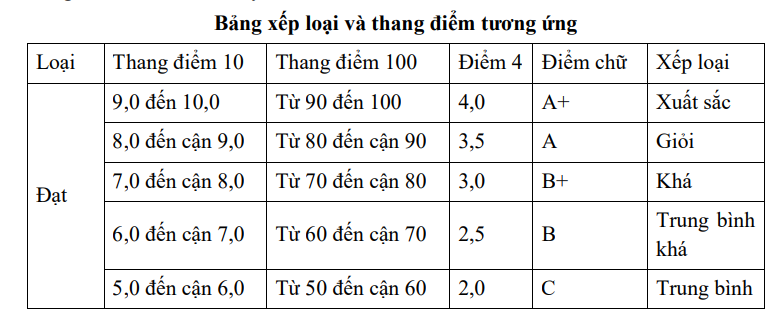

Điểm trung bình chung tích lũy (ĐTBCTL) là điểm trung bình của các học phần mà sinh
viên đã đăng ký học từ lúc bắt đầu khóa học đến thời điểm được tính với trọng số là số
tín chỉ đã được tích lũy (đạt từ 5,0 điểm trở lên) của mỗi học phần (được tính theo điểm
học phần cao nhất trong các lần học). ĐTBCTL được tính khi sinh viên đủ điều kiện tốt
nghiệp, được dùng để phân loại kết quả học tập và xếp hạng tốt nghiệp.

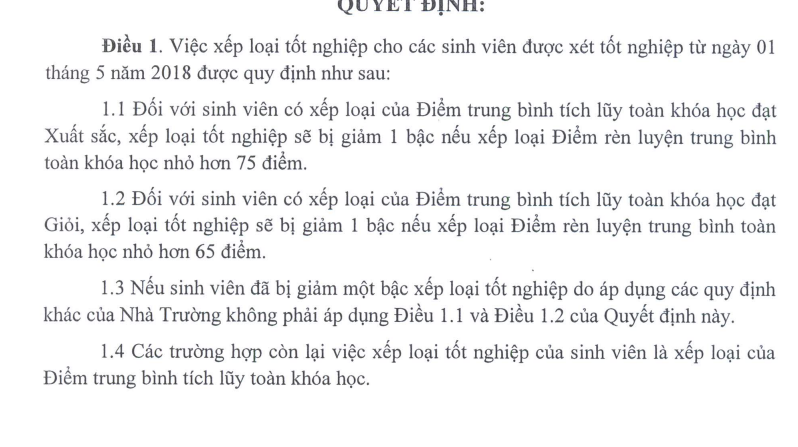

In [ ]:
#Fill các sinh viên đã tốt nghiệp nếu tiếng anh là null với 1
#Điền socc_tienganh null với 0
df['socc_tienganh'].value_counts()
mask = (df['xeploai'].notnull()) & (df['socc_tienganh'] == 0)
df.loc[mask, 'socc_tienganh'] = 1
df.loc[mask, 'tienganh'] = 'Unknown'

In [ ]:
#kiểm tra đủ điều kiện tốt nghiệp
df['du_dktn'] = ((df['sotc_tichluy'] >= df['tc_yeucau']) & (df['socc_tienganh']>0)).astype(int)
#Tạo columns điểm rèn luyện trung bình toàn khóa
df['tb_drl'] = df[['drlnam1', 'drlnam2', 'drlnam3', 'drlnam4', 'drlnam5', 'drlnam6']].mean(axis=1)

In [ ]:
df['socc_tienganh'].value_counts()

,count
socc_tienganh,
0.0,5576
1.0,2123
2.0,125
3.0,1


In [ ]:
df['du_dktn'].value_counts()

,count
du_dktn,
0,5873
1,1952


In [ ]:
#Xếp loại tốt nghiệp theo điểm tích lũy
df.loc[(df['du_dktn'] == 1) & (df['dtb_tichluy'] >= 5) & (df['dtb_tichluy'] < 6), 'label'] = 'Trung bình'
df.loc[(df['du_dktn'] == 1) & (df['dtb_tichluy'] >= 6) & (df['dtb_tichluy'] < 7), 'label'] = 'Trung bình khá'
df.loc[(df['du_dktn'] == 1) & (df['dtb_tichluy'] >= 7) & (df['dtb_tichluy'] < 8), 'label'] = 'Khá'
df.loc[(df['du_dktn'] == 1) & (df['dtb_tichluy'] >= 8) & (df['dtb_tichluy'] < 9), 'label'] = 'Giỏi'
df.loc[(df['du_dktn'] == 1) & (df['dtb_tichluy'] >= 9) & (df['dtb_tichluy'] < 10), 'label'] = 'Xuất sắc'

#Thêm điều kiện điểm rèn luyện
df.loc[(df['label'] == 'Xuất sắc') & (df['tb_drl'] < 75), 'label'] = 'Giỏi'
df.loc[(df['label'] == 'Giỏi') & (df['tb_drl'] < 65), 'label'] = 'Khá'

#Thêm điều cảnh cáo học vụ
df.loc[(df['label'] == 'Xuất sắc') & (df['canhcao'] ==1), 'label'] = 'Giỏi'
df.loc[(df['label'] == 'Giỏi') & (df['canhcao'] ==1), 'label'] = 'Khá'

#Số tín chỉ rớt
df.loc[(df['label'] == 'Xuất sắc') & ((df['tc_rot_tong'])/(df['sotc_tichluy'])>0.05), 'label'] = 'Giỏi'
df.loc[(df['label'] == 'Giỏi') & ((df['tc_rot_tong'])/(df['sotc_tichluy'])>0.05), 'label'] = 'Khá'

#Còn lại fill với 'Rớt'
df['label'].fillna('Rớt', inplace=True)

<ipython-input-285-cd7d141cd698>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['label'].fillna('Rớt', inplace=True)


In [ ]:
df['label'].value_counts()

,count
label,
Rớt,5910
Khá,1123
Giỏi,459
Trung bình khá,209
Trung bình,111
Xuất sắc,13


#Tiền xử lý

In [ ]:
#df_chung = df_drop.dropna(subset='label')
df_chung = df.copy()

In [ ]:
df_chung.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7825 entries, 0 to 8314
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mssv            7825 non-null   object 
 1   xeploai         1572 non-null   object 
 2   soquyetdinh     1572 non-null   object 
 3   ngaycapvb       4 non-null      object 
 4   namsinh         7825 non-null   float64
 5   gioitinh        7825 non-null   float64
 6   noisinh         7825 non-null   object 
 7   lopsh           7825 non-null   object 
 8   khoa            7825 non-null   object 
 9   hedt            7825 non-null   object 
 10  khoahoc         7825 non-null   float64
 11  chuyennganh2    7825 non-null   object 
 12  tinhtrang       7825 non-null   float64
 13  diachi_tinhtp   7825 non-null   object 
 14  diemnamhoc1     7797 non-null   float64
 15  diemnamhoc2     7406 non-null   float64
 16  diemnamhoc3     7086 non-null   float64
 17  diemnamhoc4     6787 non-null   float6

##ngaycapvb

In [ ]:
df.loc[df['mssv']=='D396F33FXPvAibaEXe+k2gCw0RZzlacMv04fDVkq', 'ngaycapvb'] = '11/10/2019'
df.loc[df['mssv']=='487A9A3FXPvAibaEXe+n4oL3iuTqC6vV9FvUFu7N', 'ngaycapvb'] = '09/6/2021'
df.loc[df['mssv']=='B721B939XPvAibaEXe9Q2McsUcINTscwU/8uZNla', 'ngaycapvb'] = '09/6/2021'
df.loc[df['mssv']=='74BDC2C0XPvAibaEXe+r7f7XCVFwZpJLOv4SjWsq', 'ngaycapvb'] = '27/5/2020'

In [ ]:
df['ngaycapvb'] = df['ngaycapvb'].str.strip()
def convert_to_datetime(date_str):
    if pd.isnull(date_str) or date_str.strip() == '':
        return date_str
    else:
        try:
            return pd.to_datetime(date_str.strip(), format='%d/%m/%Y')
        except ValueError:
            return pd.NaT  # Return NaT if conversion fails

df['ngaycapvb'] = df['ngaycapvb'].apply(convert_to_datetime)

df['ngaycapvb'] = df['ngaycapvb'].dt.date

##Điểm và đrl

In [ ]:
#Làm tròn
diemnamhoc_cols = [col for col in df_chung.columns if col.startswith('diemnamhoc')]
diemrl_cols = [col for col in df_chung.columns if col.startswith('drlnam')]

df_chung.loc[:, diemnamhoc_cols] = df_chung[diemnamhoc_cols].round(2)
df_chung.loc[:, diemrl_cols] = df_chung[diemrl_cols].round(2)

##Điều chỉnh tinh_tp

In [ ]:
import unicodedata

def normalize_text(text):
    if isinstance(text, str):
        return unicodedata.normalize('NFC', text)
    return text
df_chung['diachi_tinhtp'] = df['diachi_tinhtp'].apply(normalize_text)

In [ ]:
df_chung['diachi_tinhtp'] = df_chung['diachi_tinhtp'].str.strip()
df_chung['diachi_tinhtp'] = df_chung['diachi_tinhtp'].str.replace("'", "", regex=False)

In [ ]:
TDVMNPB = np.array(["Hà Giang","Thành phố Hà Giang", "Huyện Đồng Văn", "Huyện Mèo Vạc", "Huyện Yên Minh", "Huyện Quản Bạ",
                 "Huyện Vị Xuyên", "Huyện Bắc Mê", "Huyện Hoàng Su Phì", "Huyện Xín Mần", "Huyện Bắc Quang", "Huyện Quang Bình",
    "Cao Bằng","Thành phố Cao Bằng", "Huyện Bảo Lâm", "Huyện Bảo Lạc", "Huyện Hạ Lang", "Huyện Hà Quảng", 'Tỉnh Hà Giang',
                 "Huyện Hòa An", "Huyện Nguyên Bình", "Huyện Phục Hòa", "Huyện Quảng Uyên", "Huyện Thạch An", "Huyện Trùng Khánh",
    "Bắc Kạn","Thành phố Bắc Kạn", "Huyện Ba Bể", "Huyện Bạch Thông", "Huyện Chợ Đồn", "Huyện Chợ Mới",
                "Huyện Na Rì", "Huyện Ngân Sơn", "Huyện Pác Nặm",
    "Tuyên Quang","Thành phố Tuyên Quang", "Huyện Chiêm Hóa", "Huyện Hàm Yên", "Huyện Lâm Bình", "Huyện Na Hang",
                    "Huyện Sơn Dương", "Huyện Yên Sơn",
    "Lào Cai","Thành phố Lào Cai", "Huyện Bắc Hà", "Huyện Bảo Thắng", "Huyện Bảo Yên", "Huyện Bát Xát",
                "Huyện Mường Khương", "Huyện Sa Pa", "Huyện Si Ma Cai", "Huyện Văn Bàn",
    "Yên Bái","Thành phố Yên Bái", "Thị xã Nghĩa Lộ", "Huyện Lục Yên", "Huyện Mù Cang Chải", "Huyện Trấn Yên",
                "Huyện Trạm Tấu", "Huyện Văn Chấn", "Huyện Văn Yên", "Huyện Yên Bình",
    "Thái Nguyên","Thành phố Thái Nguyên", "Thành phố Sông Công", "Huyện Đại Từ", "Huyện Định Hóa", "Huyện Đồng Hỷ",
                    "Huyện Phổ Yên", "Huyện Phú Bình", "Huyện Phú Lương", "Huyện Võ Nhai",'Xã Lương Phú','Trung Thành',
    "Lạng Sơn","Thành phố Lạng Sơn", "Huyện Bắc Sơn", "Huyện Bình Gia", "Huyện Cao Lộc", "Huyện Chi Lăng",
                 "Huyện Đình Lập", "Huyện Hữu Lũng", "Huyện Lộc Bình", "Huyện Tràng Định", "Huyện Văn Lãng", "Huyện Văn Quan",'Xã Chi Lăng',
                'Xã Bắc Sơn','Tỉnh Lạng Sơn',
    "Quảng Ninh","Thành phố Hạ Long", "Thành phố Móng Cái", "Thành phố Cẩm Phả", "Thành phố Uông Bí",
                   "Huyện Bình Liêu", "Huyện Cô Tô", "Huyện Đầm Hà", "Huyện Hải Hà", "Huyện Hoành Bồ", "Huyện Tiên Yên", "Huyện Vân Đồn",
                  'Phường Phương Đông','Tỉnh Quảng Ninh', 'Phường Cẩm Thủy',
    "Phú Thọ","Thành phố Việt Trì", "Thị xã Phú Thọ", "Huyện Cẩm Khê", "Huyện Đoan Hùng", "Huyện Hạ Hòa", 'Tỉnh Phú Thọ',
                "Huyện Lâm Thao", "Huyện Phù Ninh", "Huyện Tam Nông", "Huyện Tân Sơn", "Huyện Thanh Ba", "Huyện Thanh Sơn", "Huyện Thanh Thủy", "Huyện Yên Lập",
    "Bắc Giang","Thành phố Bắc Giang", "Huyện Hiệp Hòa", "Huyện Lạng Giang", "Huyện Lục Nam", "Huyện Lục Ngạn",
                  "Huyện Sơn Động", "Huyện Tân Yên", "Huyện Việt Yên", "Huyện Yên Dũng", "Huyện Yên Thế",
    "Điện Biên","Thành phố Điện Biên Phủ", "Thị xã Mường Lay", "Huyện Điện Biên", "Huyện Điện Biên Đông",
                  "Huyện Mường Ảng", "Huyện Mường Chà", "Huyện Mường Nhé", "Huyện Nậm Pồ", "Huyện Tủa Chùa", "Huyện Tuần Giáo",
                    'Tỉnh Điện Biên',
    "Hòa Bình","Thành phố Hòa Bình", "Huyện Cao Phong", "Huyện Đà Bắc", "Huyện Kim Bôi", "Huyện Kỳ Sơn",
                 "Huyện Lạc Sơn", "Huyện Lạc Thủy", "Huyện Lương Sơn", "Huyện Mai Châu", "Huyện Tân Lạc", "Huyện Yên Thủy",'Tỉnh Hòa Bình',
    "Sơn La","Thành phố Sơn La", "Huyện Bắc Yên", "Huyện Mai Sơn", "Huyện Mộc Châu", "Huyện Mường La",
               "Huyện Phù Yên", "Huyện Quỳnh Nhai", "Huyện Sông Mã", "Huyện Sốp Cộp", "Huyện Thuận Châu", "Huyện Vân Hồ",
    "Lai Châu","Thành phố Lai Châu", "Huyện Mường Tè", "Huyện Nậm Nhùn", "Huyện Phong Thổ", "Huyện Sìn Hồ",
                 "Huyện Tam Đường", "Huyện Tân Uyên", "Huyện Than Uyên",'Tỉnh Bắc Giang'])

In [ ]:
DNB = np.array(['Thành phố Hồ Chí Minh',"Thành phố Thủ Dầu Một", "Thành phố Dĩ An", "Thành phố Thuận An",
        "Thị xã Bến Cát", "Thị xã Tân Uyên", "Huyện Bàu Bàng",'Phường Tân Chánh Hiệp',
        "Huyện Bắc Tân Uyên", "Huyện Phú Giáo", "Huyện Dầu Tiếng", "Thành phố Biên Hòa", "Thành phố Long Khánh", "Huyện Long Thành",
        "Huyện Nhơn Trạch", "Huyện Trảng Bom", "Huyện Thống Nhất",
        "Huyện Cẩm Mỹ", "Huyện Vĩnh Cửu", "Huyện Định Quán", "Huyện Xuân Lộc",
        "Huyện Tân Phú","Thành phố Vũng Tàu", "Thành phố Bà Rịa", "Thị xã Phú Mỹ",
        "Huyện Long Điền", "Huyện Đất Đỏ", "Huyện Xuyên Mộc",'Tây Ninh',
        "Huyện Châu Đức", "Huyện Côn Đảo","Tỉnh Tây Ninh", "Thành phố Tây Ninh", "Huyện Tân Biên", "Huyện Tân Châu",'Xã Suối Dây',
        "Huyện Dương Minh Châu", "Huyện Châu Thành", "Huyện Hòa Thành",'Phường Ninh Sơn',
        "Huyện Gò Dầu", "Huyện Bến Cầu", "Huyện Trảng Bàng","Thành phố Đồng Xoài", "Thị xã Bình Long", "Thị xã Phước Long",
        "Huyện Bù Đăng", "Huyện Bù Gia Mập", "Huyện Chơn Thành",  'Thị xã Đồng Xòai',
        "Huyện Đồng Phú", "Huyện Hớn Quản", "Huyện Lộc Ninh", "Huyện Phú Riềng",  "Quận 1", "Quận 2", "Quận 3", "Quận 4", "Quận 5", "Quận 6", "Quận 7",
        "Quận 8", "Quận 9", "Quận 10", "Quận 11", "Quận 12", "Quận Bình Thạnh",
        "Quận Phú Nhuận", "Quận Gò Vấp", "Quận Tân Bình", "Quận Tân Phú",
        "Quận Thủ Đức", "Quận Bình Tân", "Huyện Củ Chi", "Huyện Hóc Môn", 'Hiệp Phú','Phường Tam Phú', 'Phường Linh Tây', 'Xã Tân Thanh Tây',
        "Huyện Bình Chánh", "Huyện Nhà Bè", "Huyện Cần Giờ",'Tình Đồng Nai','Thị xã Long Khánh','Thị xã Thuận An','Tỉnh Bình Dương',  'Bình Dương',
        'Huyện Tân Thành','Tỉnh Bà Rịa - Vũng Tàu','Tỉnh Đồng Nai','Phường Long Bình',"Huyện Châu Đức", "Huyện Đất Đỏ", "Huyện Long Điền",
        "Huyện Tân Thành", "Huyện Xuyên Mộc","Xã Long Tân", "Xã Bàu Chinh", "Xã Phước Tỉnh",'Thị trấn Vĩnh An',
        "Xã Phước Hải", "Xã Lộc An", "Xã Mỹ Xuân", "Xã Tam Phước", "Xã Tân Hưng", "Xã Côn Đảo","Xã Lai Uyên", "Xã An Tây",
        "Xã Phước Hòa","Xã Tân Hưng", "Xã Hưng Hoà", "Xã Minh Hòa","Xã Tân Hạnh", "Xã Sông Thao", "Xã Quảng Tiến","Xã Phú Hội", "Xã Vĩnh An", "Xã Vĩnh Tân",
        "Xã Long Khánh", "Xã Thái Bình", "Xã Tân Phú","Xã Ninh Điền", "Xã An Bình", "Xã Hòa Thành",
        "Xã Phước Hải", "Xã Lộc An", "Xã Mỹ Xuân","Xã Tam Phước", "Xã Tân Hưng", "Xã Côn Đảo",
        'Phường An Bình','Phường Long Trường','Phường Phú Cường','Phường Linh Chiểu','Phường Long Bình Tân','Phường Phước Long B','Phường Tăng Nhơn Phú A','Phường Trường Thọ','Phường Linh Đông',
        'Phường Tân Thành','Phường Hiệp Phú','phường An Bình','Phường Mỹ Phước','Phường Tân Phong','Phường Phú Tân',
        'Thành phố Biên Hòa','Thị trấn Long Thành','Xã An Thái Đông','Xã Quới An','Xã Long Điền B','Xã Hội Nghĩa','Xã Long Mỹ','Xã Hòa Hưng','Xã Bình Lộc','Xã Đông Hòa','Xã Phú Xuân','Xã Thiện Tân','Xã Tân Hội',
        'Thị xã Đồng Xoài','Xã Bù Nho','Xã Long Thành Trung','Xã Bình Trung','Xã Phú Trung','Xã Đôn Thuận','Xã Tân An Hội',
        'Tỉnh Bình Phước','Xã Bàu Đồn','Xã Phú Mỹ','Xã Minh Thạnh','Xã Lạc An','xã Trà Vong','Xã Bảo Bình','khu phố Tam Đa','Xã Lâm San',
'Thị xã Dĩ An','Xã Phước Trạch','Xã Tân Đông','Ấp Ba Sa','Xã Xuân Bắc','Thành phố Biên Hoà','ấp 4','Tân Định','Xã Hố Nai 3', 'Phường Hiệp Ninh', 'Phường Phước Bình','Phường Bình Hưng Hoà A',
        'Xã An Phước',  'Xã Tân Thông Hội' , 'Xã Bưng Riềng', 'Phường Tân Hiệp', 'Xã Long Giang', 'Phường Linh Trung', 'Xã Sông Ray','Huyện Bù Đốp',
        'Phường An Khánh', 'Xã Bình Mỹ', 'Xã Thuận Phú', 'Phường Trảng Dài', 'Xã Phước Thiền', 'Xã Bình Minh', 'Xã Hiệp Phước', 'Xã Suối Nghệ','Thị trấn Tân Phú','Xã Tân Khai','Lộc Thái',
        'Thị Xã Đồng Xoài',      'Phường Trung Mỹ Tây', 'Phường An Lạc', 'Xã Xuân Thạnh', 'Xã Tân An', 'Đường TMT 09', 'xã Đôn Thuận', 'Xã Bà Điểm', 'xã An Hòa',
        'Xã An Hòa', 'Xã Hóa An', 'Phường Bình An',     'Xã Long Nguyên',     'Xã Hắc Dịch', 'Xã Bàu Hàm',   'Phường Linh Xuân',  'tỉnh Đồng Nai', 'Bù Gia Mập',
         'Phường Truờng Thọ', 'khu phố 1','Thị trấn Tân Bình','KP 5','ấp 3B','ấp 3','Phường 1','Xã Long Hòa','khu phố 5', 'Ấp 5','Xã Thành Tâm','thôn III',
          'Phường 4','Xã Tân Lập','Xã Sông Trầu','Xã Thạnh Phú','Phường Đông Hưng Thuận', 'Phường Bình Đa','Thị trấn Định Quán','Xã Cẩm Đường','Phường Tam Hiệp',
           'Phường Hiệp Thành','Xã Trung Chánh','Phường Phước Long A','Xã Xuân Tâm','Xã long thọ',   'Phường Thảo Điền', 'Phường Tân Đông Hiệp', 'Phường Tam Bình',
          'Phường An Phú','Xã Trừ Văn Thố','Phường Phú Lợi','thành phố Hồ Chí Minh','Phường Tân Thới Hiệp', 'Phường Phú Mỹ','Thị Trấn Dương Minh Châu',
          'Phường Phú Hòa','Phường Bình Chuẩn','Xã Long Phước','Phường Bình Chiểu','Phường Tân Xuân','Đồng Nai', 'Bình Phước','Thị trấn Hòa Thành', 'tỉnh Bình Phước',
          'Phường Tân An','Thị trấn Đức Phong', 'Xã Phú Lập', 'Phường Tân Hòa','Xã Lang Minh',    'phường Tân Thới Hiệp','Xã Phú Thạnh','Xã Chà Là',
          'Phường Uyên Hưng', 'Phường Phước Nguyên', 'Xã Tân Bình', 'Phường Chánh Nghĩa',  'quận Thủ Đức', 'Bà Rịa - Vũng Tàu','Xã Bảo Quang','Huyện Bầu Bàng',
          'Xã Bình An', 'đường 184','khu phố 3','Phường 7','Phường 17','Khu đô thị sinh thái', 'Khu phố 6','phường 4','Xã Xuân Đông','tổ 26','Huyện Châu thành',
          'Phường 12','ấp 2','khu phố 6','Xã Nghĩa Thành','TP HCM','phường Xuân Trung', 'Xã Bình Giã', 'tp Đồng Xoài'
        ])

In [ ]:
DBSH = np.array([ 'Thành phố Hà nội', 'Thành phố Hà Nội','Hà Nội',
            "Quận Ba Đình", "Quận Hoàn Kiếm", "Quận Tây Hồ", "Quận Long Biên",
            "Quận Cầu Giấy", "Quận Đống Đa", "Quận Hai Bà Trưng",
            "Quận Hoàng Mai", "Quận Thanh Xuân", "Quận Nam Từ Liêm",
            "Quận Bắc Từ Liêm", "Quận Hà Đông",
            "Huyện Sóc Sơn", "Huyện Đông Anh", "Huyện Gia Lâm",
            "Huyện Thanh Trì", "Huyện Mê Linh", "Huyện Ba Vì",
            "Huyện Phúc Thọ", "Huyện Đan Phượng", "Huyện Hoài Đức",
            "Huyện Quốc Oai", "Huyện Thạch Thất", "Huyện Chương Mỹ",
            "Huyện Thanh Oai", "Huyện Thường Tín", "Huyện Phú Xuyên",
            "Huyện Ứng Hòa", "Huyện Mỹ Đức","Thị xã Sơn Tây",
              'Phường Đống Đa', 'Xã Lâm Sơn',
            'Thành phố Hải Phòng',
            "Quận Hồng Bàng", "Quận Lê Chân", "Quận Ngô Quyền",
            "Quận Kiến An", "Quận Hải An", "Quận Đồ Sơn",
            "Quận Dương Kinh",
            "Huyện Thủy Nguyên", "Huyện An Dương", "Huyện An Lão",
            "Huyện Kiến Thụy", "Huyện Tiên Lãng", "Huyện Vĩnh Bảo",
            "Huyện Cát Hải", "Huyện Bạch Long Vĩ",
            "Tỉnh Hưng Yên",
            "Thành phố Hưng Yên",
            "Huyện Văn Lâm", "Huyện Văn Giang", "Huyện Yên Mỹ",
            "Huyện Mỹ Hào", "Huyện Ân Thi", "Huyện Khoái Châu",
            "Huyện Kim Động", "Huyện Tiên Lữ", "Huyện Phù Cừ",
             "Tỉnh Hà Nam", 'Xã Liên Nghĩa',
            "Thành phố Phủ Lý",
            "Huyện Duy Tiên", "Huyện Kim Bảng", "Huyện Thanh Liêm",
            "Huyện Bình Lục", "Huyện Lý Nhân",
            "Tỉnh Nam Định","Thành phố Nam Định",'Phường Ngô Quyền',
            "Huyện Mỹ Lộc", "Huyện Vụ Bản", "Huyện Ý Yên",
            "Huyện Nghĩa Hưng", "Huyện Nam Trực", "Huyện Trực Ninh",
            "Huyện Xuân Trường", "Huyện Giao Thủy", "Huyện Hải Hậu",
            "Tỉnh Thái Bình",
            "Thành phố Thái Bình",
            "Huyện Quỳnh Phụ", "Huyện Hưng Hà", "Huyện Đông Hưng",
            "Huyện Thái Thụy", "Huyện Tiền Hải", "Huyện Kiến Xương",
            "Huyện Vũ Thư", 'Xã Vũ Hòa','Xã Đồng Phú','Thái Bình',
            "Tỉnh Ninh Bình",'Ninh Bình',
            "Thành phố Ninh Bình",
            "Huyện Tam Điệp", "Huyện Nho Quan", "Huyện Gia Viễn",
            "Huyện Hoa Lư", "Huyện Yên Khánh", "Huyện Kim Sơn",
            "Huyện Yên Mô",'Thành phố Tam Điệp',
            "Tỉnh Vĩnh Phúc",'Xã Phú Tân','Phường Xuân Hòa',
            "Thành phố Vĩnh Yên",'Thành phố Phúc Yên',
            "Huyện Phúc Yên", "Huyện Lập Thạch", "Huyện Tam Dương",
            "Huyện Tam Đảo", "Huyện Bình Xuyên", "Huyện Yên Lạc",
            "Huyện Vĩnh Tường", "Huyện Sông Lô",
            "Tỉnh Bắc Ninh", "Thành phố Bắc Ninh",
            "Huyện Yên Phong", "Huyện Quế Võ", "Huyện Tiên Du",
            "Huyện Từ Sơn", "Huyện Thuận Thành", "Huyện Gia Bình",
            "Huyện Lương Tài",'Xã Mỹ Tân',
                  'Phường Văn Miếu',
                  'Tỉnh Hải Dương',
            'Tỉnh Hải Dương','Xã Nam Chính','Xã Liên Hiệp','Xã An Châu','Huyện Kinh Môn','Huyện Thanh Hà'])

In [ ]:
BTBDHMT = np.array([
    "Tỉnh Thanh Hóa","Thành phố Thanh Hóa",'Tỉnh Thanh Hoá','Tỉnh Thanh Hoá',
            "Huyện Ngọc Lặc", "Huyện Tĩnh Gia", "Huyện Hậu Lộc",
            "Huyện Nga Sơn", "Huyện Đông Sơn", "Huyện Quảng Xương",
            "Huyện Hoằng Hóa", "Huyện Thiệu Hóa", "Huyện Triệu Sơn",
            "Huyện Vĩnh Lộc", "Huyện Yên Định", "Huyện Như Thanh",
            "Huyện Như Xuân", "Huyện Mường Lát", "Huyện Lang Chánh",
            "Huyện Thường Xuân", "Huyện Bá Thước", "Huyện Cẩm Thủy",
            'Xã Phú Thanh','Xã Phú Lâm',
    "Tỉnh Nghệ An","Thành phố Vinh",
            "Huyện Anh Sơn", "Huyện Thanh Chương", "Huyện Diễn Châu",
            "Huyện Nghi Lộc", "Huyện Hưng Nguyên", "Huyện Nam Đàn",
            "Huyện Quỳnh Lưu", "Huyện Tân Kỳ", "Huyện Đô Lương",
            "Huyện Con Cuông", "Huyện Tương Dương", "Huyện Nghĩa Đàn",
            "Huyện Quế Phong", "Huyện Kỳ Sơn", "Huyện Thanh Chương",
            "Huyện Vũ Quang", "Huyện Mường Quạ",'Phường Hưng Bình',
            'Xã Nghi Kim','Phường Lê Mao','Thị xã Hoàng Mai',
            'Nghệ An',
    "Tỉnh Hà Tĩnh","Thành phố Hà Tĩnh",
            "Huyện Hương Khê", "Huyện Hương Sơn", "Huyện Đức Thọ",
            "Huyện Vũ Quang", "Huyện Can Lộc", "Huyện Nghi Xuân",
            "Huyện Kỳ Anh", "Huyện Thạch Hà", "Huyện Cẩm Xuyên",
            "Huyện Xuân Lộc", "Huyện Lộc Hà", "Huyện Thạch Hà",
            "Huyện Thành phố Hồng Lĩnh",  'Hà Tĩnh', 'Quảng Trị',
    "Tỉnh Quảng Bình","Thành phố Đồng Hới",
            "Huyện Bố Trạch", "Huyện Quảng Trạch", "Huyện Tuyên Hóa",
            "Huyện Minh Hóa", "Huyện Lệ Thủy", "Huyện Bo Trach",
            'Phường Nam Lý','Quảng Bình','Huyện Lệ Thuỷ',
    "Tỉnh Quảng Trị","Thành phố Đông Hà",
            "Huyện Hải Lăng", "Huyện Triệu Phong", "Huyện Cam Lộ",
            "Huyện Vĩnh Linh", "Huyện Gio Linh", "Huyện Đakrong",
            "Huyện Hướng Hóa",
    "Tỉnh Thừa Thiên Huế","Thành phố Huế",
            "Huyện Hương Thủy", "Huyện Hương Trà", "Huyện Phong Điền",
            "Huyện Quảng Điền", "Huyện Phú Vang", "Huyện A Lưới",
            "Huyện Nam Đông",  'Thị xã Hương Thủy',  'Huyện Phú Lộc',
            'Thừa Thiên Huế','Phường Định Hòa',
    "Tỉnh Đà Nẵng","Thành phố Đà Nẵng",
            "Quận Hải Châu", "Quận Thanh Khê", "Quận Sơn Trà",
            "Quận Ngũ Hành Sơn", "Quận Liên Chiểu", "Quận Hoàng Sa",
        "Huyện Hòa Vang", 'Thành Phố Đà Nẵng','Xã Hòa Sơn',
    "Tỉnh Quảng Nam","Thành phố Tam Kỳ",
            "Huyện Núi Thành", "Huyện Phú Ninh", "Huyện Thăng Bình",
            "Huyện Tiên Phước", "Huyện Nam Giang", "Huyện Đông Giang",
            "Huyện Đại Lộc", "Huyện Quế Sơn", "Huyện Phước Sơn",
            "Huyện Hiệp Đức", "Huyện Bắc Trà My", "Huyện Nam Trà My",
            "Huyện Tây Giang", "Huyện Duy Xuyên", "Huyện Hội An",
            'Thị trấn Núi Thành', 'xã Điện Thọ','Xã Bình Hải',
            'Thị xã Điện Bàn','Quảng Nam',
    "Tỉnh Quảng Ngãi","Thành phố Quảng Ngãi", "Tình Quảng Ngãi",
            "Huyện Bình Sơn", "Huyện Trà Bồng", "Huyện Sơn Tịnh",
            "Huyện Tư Nghĩa", "Huyện Đức Phổ", "Huyện Nghĩa Hành",
            "Huyện Mộ Đức", "Huyện Ba Tơ", "Huyện Lý Sơn", 'Xã Đức Phong','Quảng Ngãi',
    "Tỉnh Bình Định","Thành phố Quy Nhơn",
            "Huyện An Lão", "Huyện Hoài Nhơn", "Huyện Phù Mỹ",
            "Huyện Vĩnh Thạnh", "Huyện Tây Sơn", "Huyện Tuy Phước",
            "Huyện Phù Cát", "Huyện Hoài Ân", "Huyện Bình Sơn", 'Xã An Nhơn',
            'Thị trấn Ngô Mây', 'Xuân Bắc', 'Xã Mỹ Thọ', 'Xã Tam Quan Nam',
            'Phường Quang Trung','Phường Thị Nại',  'tỉnh Bình Định','Huyện Hòai Nhơn',
              'Bình Định','Huyện Hòai Ân','huyện Tuy Phước',
    "Tỉnh Phú Yên","Thành phố Tuy Hòa",
            "Huyện Đông Hòa", "Huyện Tuy An", "Huyện Phú Hòa",
            "Huyện Sông Hinh", "Huyện Đồng Xuân", "Huyện Tây Hòa",
            "Huyện Sơn Hòa", "Huyện Tây Hòa", 'Thành phố Tuy Hoà',
            'Thị xã Sông Cầu', 'Phú Yên.', 'Phú Yên',
    "Tỉnh Khánh Hòa","Thành phố Nha Trang", 'Phường Phước Hòa',
            "Huyện Cam Lâm", "Huyện Diên Khánh", "Huyện Vạn Ninh",
            "Huyện Khánh Vĩnh", "Huyện Ninh Hòa", "Huyện Đại Lộc",
            'Phường Vĩnh Hải', 'Phường Vĩnh Hòa','Thị xã Ninh Hoà',
            'Thị xã Ninh Hòa','Khánh Hòa','Tỉnh Khánh Hòa',
    "Tỉnh Ninh Thuận", "Thành phố Phan Rang - Tháp Chàm",
        "Huyện Bác Ái", "Huyện Ninh Hải", "Huyện Ninh Sơn",
        "Huyện Thuận Bắc", "Huyện Thuận Nam",'Huyện Hàm Thuận Bắc','Phường Đại Nài',
         'Ninh Thuận',
    'Tỉnh Khánh Hoà','Huyện Quảng Ninh','Huyện Phú Hoà',
    'Tỉnh Bình Thuận','Thành phố Hội An','Thị xã An Nhơn','Huyện Tuy Phong', 'Phường Phú Thủy',
        'Xã Chí Công', 'Xã Đức Bình', 'Huyện Hàm Thuận Nam','Xã Hàm Minh', 'Phường Cẩm Châu',
    'Phường Thanh Hà','Phường Minh An','Thị trấn Lạc Tánh','Xã Đông Hà','Xã Tân Hà',

    'Thành phố Phan Thiết','Huyện Đông Hoà','Huyện Sơn Hoà','Thành phố Cam Ranh','Huyện Đức Linh','Huyện Vân Canh','Thị xã Ba Đồn','Xã Vĩnh Thạnh',
    'Thành phố Phan Rang -Tháp Chàm','Thị trấn Nam Phước','Huyện Bắc Bình','Xã Gia An','Huyện Tánh Linh',  'Huyện Hàm Tân', 'Xã Nghị Đức',
    'Thị Xã La Gi'])

In [ ]:
TN = np.array([
    "Tỉnh Đắk Lắk","Thành phố Buôn Ma Thuột",
            "Huyện Buôn Đôn", "Huyện Cư Mgar", "Huyện Ea H'leo",
            "Huyện Ea Súp", "Huyện Krông Búk", "Huyện Krông Ana",
            "Huyện Lắk", "Huyện M'Drắk", "Huyện Thời Ấn",'Huyện Cư M\\gar',
            "Huyện Cư Kuin", "Huyện Buôn Hồ","Xã Cư Né", "Xã Cư Êbur", "Xã Ea Đrông","Xã Krông Búk", "Xã Ea H'leo", 'Xã Hòa Thuận',
            'Huyện Krông Bông', 'Xã Dray Sáp', 'Xã Ea Na', 'Xã Ea Tar', 'Huyện M\\Đrắk','Thị trấn Krông Năng',
            'Thị Xã Buôn Hồ', 'Phường Tự An', 'Thị trấn Phước An','Xã Cuor Đăng',  'Đắk Lắk','Huyện Ea H\\leo',
            'Huyện Krông Buk',  'Phường Khánh Xuân','Xã Phú Lộc',
    "Tỉnh Đắk Nông","Thành phố Gia Nghĩa",
            "Huyện Đắk Mil", "Huyện Đắk Song", "Huyện Gia Nghĩa",
            "Huyện Krông Nô", "Huyện Tuy Đức", "Huyện Chư Jút","Xã Đắk Ha", "Xã Đắk Wil", "Xã Đắk Som","Xã Đắk R'măng", "Xã Đắk Song",
            'Đăk Lao', 'Xã Trúc Sơn', 'Phường Nghĩa Trung', 'Huyện Đăk Song', 'Huyện Cư Jút','Đắk Nông',
    "Tỉnh Gia Lai","Thành phố Pleiku",
            "Huyện An Khê", "Huyện Chư Prông", "Huyện Chư Sê",
            "Huyện Đức Cơ", "Huyện Ia Grai", "Huyện Krông Pa", 'Xã Chư Gu', 'Phường Hoa Lư',
            "Huyện Mang Yang", "Huyện Phú Thiện", "Huyện Ayun Pa",'Thị xã An Khê',"Xã Ia Krai", "Xã Ia Mlah", "Xã Ia Tô","Xã Kông Yang", "Xã Chư Păh",
            'Gia Lai','Huyện Chư Pưh',
    "Tỉnh Kon Tum","Thành phố Kon Tum",
            "Huyện Đăk Glei", "Huyện Đăk Tô", "Huyện Kon Plong",
            "Huyện Kon Ray", "Huyện Ngọc Hồi", "Huyện Sa Thầy", "Xã Đăk Mar", "Xã Đăk Nhoong", "Xã Đăk Pne","Xã Ngọc Wang", "Xã Sa Nhơn",
            "Huyện Tu Mơ Rông", 'Huyện Đắk Tô','Thị trấn Sa Thầy', 'Kon Tum',
    "Tỉnh Lâm Đồng","Thành phố Đà Lạt", "Thành phố Bảo Lộc",
            "Huyện Đạ Huoai", "Huyện Đạ Tẻh", "Huyện Di Linh",
            "Huyện Lạc Dương", "Huyện Lâm Hà", "Huyện Đức Trọng",
            "Huyện Ninh Sơn", "Huyện Bảo Lâm", "Huyện Đam Rông","Xã Đạ Lạt", "Xã Liên Đầm", "Xã Đạ Sar","Xã Ninh Gia", "Xã Đạ Chais"
            ,'Xã Ka Đô','Thành Phố Đà Lạt','Thị trấn Liên Nghĩa','Lâm Đồng', 'Xã Hiệp Thạnh','Phường 22',

    'Huyện Kbang','Huyện Đắk Hà','Xã Ea Kuăng','Huyện Đơn Dương','Huyện Đắk R\\Lấp', 'Thị xã Gia Nghĩa','Huyện Kông Chro',
    'Huyện Ea Kar','Huyện Krông Pắc','Huyện KBang','Huyện Đăk Mil','Huyện Krông Năng'])

In [ ]:
DBSCL = np.array(["Tỉnh An Giang","Thành phố Long Xuyên", "Thành phố Châu Đốc",
                  "Huyện An Phú", "Huyện Châu Phú", "Huyện Tịnh Biên",
                  "Huyện Tri Tôn", "Huyện Phú Tân", "Huyện Chợ Mới",  "Huyện Thoại Sơn",
                  'Xã Bình Phước Xuân', 'Thị xã Tân Châu', 'Xã Phú Bình',
                  'Thị trấn Chi Lăng','Phường Châu Phú A', 'Xã Mỹ Hòa Hưng',
                  'Thị trấn Núi Sập','Xã Kiến An','Xã Tà Đảnh', 'Xã Kiến Thành',
                   'Phường Châu Phú B', 'An Giang','Xã Vĩnh Thạnh Trung','khóm Châu Long 2',
                  'Xã Long Điền A', 'Thị trấn An Phú','khóm Mỹ Thành','Xã Châu Phong',

                  "Tỉnh Bạc Liêu","Thành phố Bạc Liêu",
                  "Huyện Đông Hải", "Huyện Hòa Bình", "Huyện Hồng Dân",
                  "Huyện Phước Long", "Huyện Vĩnh Lợi", "Huyện Giá Rai",
                  'Huyện Hoà Bình', 'Thị xã Giá Rai',

                  "Tỉnh Bến Tre","Thành phố Bến Tre",
                  "Huyện Châu Thành", "Huyện Giồng Trôm", "Huyện Mỏ Cày Nam",
                  "Huyện Mỏ Cày Bắc", "Huyện Bình Đại", "Huyện Ba Tri",
                  "Huyện Thạnh Phú",'Xã Thành Thới A','Xã Đa Phước Hội',
                  'Thị trấn Giồng Trôm', 'Xã Thạnh Phú Đông', 'Xã Khánh Thạnh Tân','Xã Hương Mỹ',
                  'Bến Tre','Xã Tân Lợi Thạnh',

                  "Tỉnh Cà Mau","Thành phố Cà Mau",
                  "Huyện Cái Nước", "Huyện Đầm Dơi", "Huyện Ngọc Hiển",
                  "Huyện Năm Căn", "Huyện Thới Bình", "Huyện U Minh",
                  "Huyện Trần Văn Thời", "Huyện Phú Tân",'Xã Phú Thuận A','Phường 5',
                  'huyện Đầm Dơi','Cà Mau',

                  "Tỉnh Đồng Tháp","Thành phố Cao Lãnh", "Thành phố Sa Đéc",
                  "Huyện Lai Vung", "Huyện Lấp Vò", "Huyện Tam Nông",
                  "Huyện Thanh Bình", "Huyện Châu Thành", "Huyện Hồng Ngự",
                  "Huyện Tân Hồng",'Xã Tân Thuận Đông', 'Thị trấn Tràm Chim',
                    'Phường Mỹ Phú','Đồng Tháp','Phường 6','Phường 2',

                  "Hậu Giang","Thành phố Vị Thanh",
                  "Huyện Châu Thành", "Huyện Long Mỹ", "Huyện Phụng Hiệp",
                  "Huyện Vị Thủy", "Huyện HG", "Huyện Nga Sơn",

                  "Tỉnh Kiên Giang","Thành phố Rạch Giá", "Thành phố Hà Tiên",
                  "Huyện An Biên", "Huyện An Minh", "Huyện Châu Thành",
                  "Huyện Giang Thành", "Huyện Hòn Đất", "Huyện Kiên Hải",
                  "Huyện Phú Quốc", "Huyện U Minh Thượng", "Huyện Vĩnh Thuận",
                  'Tân Hiệp','Xã Thổ Sơn', 'Xã Tân Hiệp B','Xã Nam Thái Sơn',
                  'Xã Vĩnh Hòa','Kiên Giang',

                  "Tỉnh Sóc Trăng","Thành phố Sóc Trăng",
                  "Huyện Châu Thành", "Huyện Kế Sách", "Huyện Mỹ Tú",
                  "Huyện Ngã Năm", "Huyện Thạnh Trị", "Huyện Trần Đề",
                  "Huyện Long Phú", "Huyện Mỹ Xuyên", 'Thị xã Ngã Năm',
                  'Huyện Cù Lao Dung','Thị xã Vĩnh Châu','Phường 3','Xã Thạnh Tân', 'Xã Thiện Mỹ',

                  "Tỉnh Trà Vinh","Thành phố Trà Vinh",
                  "Huyện Càng Long", "Huyện Châu Thành", "Huyện Duyên Hải",
                  "Huyện Tiểu Cần", "Huyện Trà Cú", "Huyện Bình Đại",
                  "Huyện Cầu Ngang",'Ấp Trung 1', 'Thị xã Duyên Hải',
                  'Xã Mỹ Hòa','Thị Xã Duyên Hải','Huyện Cầu Kè',

                  "Tỉnh Vĩnh Long","Thành phố Vĩnh Long",
                  "Huyện Bình Minh", "Huyện Long Hồ", "Huyện Mang Thít",
                  "Huyện Vũng Liêm", "Huyện Tam Bình", "Huyện Trà Ôn",
                  "Huyện Vĩnh Long",'Huyện Bình Tân', 'Xã Long An',
                  'Thị trấn Vũng Liêm','Xã Hòa Lộc', 'khu phố 1','Thị trấn Long Hồ',
                    'Vĩnh Long','Xã Hiếu Phụng','Thị trấn Tam Bình',

                  "Tỉnh Tiền Giang",
                  "Thành phố Mỹ Tho",
                  "Huyện Châu Thành", "Huyện Chợ Gạo", "Huyện Gò Công Đông",
                  "Huyện Gò Công Tây", "Huyện Tân Phước", "Huyện Cai Lậy",
                  "Huyện Cái Bè", "Huyện Định Quán", "Huyện Tân Phước","Thị xã Gò Công",
                  'Xã Tân Mỹ Chánh', 'Xã An Thái Trung',    'ấp Hậu Hoa', 'Huyện Tân Phú Đông',
                  'Xã Mỹ Trung',  'Thị trấn Cái Bè','Xã Đăng Hưng Phước','Tiền Giang.','Xã Thiện Trí',
                  'Huyện Cái bè',   'Xã Tam Bình','Xã An Hữu','Xã An Thạnh Thủy','Tiền Giang','Xã Tân Bình Thạnh',
                  'Xã Bình Trưng', 'Xã An Cư', 'Xã Ngũ Hiệp','Xã Cẩm Sơn','Xã Tam Hiệp',

                  "Tỉnh Long An",
                  "Thành phố Tân An",
                  "Huyện Bến Lức", "Huyện Đức Hòa", "Huyện Đức Huệ",
                  "Huyện Thủ Thừa", "Huyện Tân Hưng", "Huyện Tân Thạnh",
                  "Huyện Cần Giuộc", "Huyện Cần Đước", "Huyện Châu Thành","Thị xã Kiến Tường",
                  'Huyện Vĩnh Hưng','Thị trấn Đức Hoà','Huyện Tân Trụ','Xã Lương Hoà',
                  'Xã An Vĩnh Ngãi','Huyện Thạnh Hóa','Thị trấn Thủ Thừa','Long An',

                  "Tỉnh Cần Thơ",'Thành phố Cần Thơ',
                  "Quận Ninh Kiều", "Quận Bình Thủy", "Quận Cái Răng",
                  "Quận Ô Môn", "Quận Thốt Nốt", "Quận Cờ Đỏ",
                  "Quận Vĩnh Thạnh", "Quận Phong Điền", "Quận Thới Lai",   'Phường Thuận Hưng',

                  "Xã Khánh An", "Xã Phú Hữu", "Xã Vĩnh Hội Đông","Xã Tân Thạnh", "Xã Mỹ Phú", "Xã An Phú",
                  "Xã Long Điền", "Xã Hưng Hội", "Xã Vĩnh Trạch Đông","Xã Vĩnh Trạch", "Xã Lộc Ninh",
                  "Xã Phú Nhuận", "Xã Mỹ Thạnh An", "Xã Bình Phú","Xã Tân Hòa", "Xã An Khánh",
                  "Xã Tân Hưng", "Xã Lý Văn Lâm", "Xã Hòa Thành","Xã Tân Thành", "Xã Đất Mới",
                  "Xã Tân Phước", "Xã Long Hậu", "Xã Phú Điền","Xã Phong Mỹ", "Xã Mỹ Tho", 'Thành Phố Mỹ Tho',
                  "Xã Vĩnh Trung", "Xã Vĩnh Tường", "Xã Hỏa Tiến","Xã Tân Tiến", "Xã Phương Bình",
                  "Xã Dương Tơ", "Xã Gành Dầu", "Xã Thổ Châu","Xã Tân Hiệp", "Xã Vĩnh Hiệp",
                  "Xã Đại Ngãi", "Xã Tham Đôn", "Xã Tân Long","Xã Thạnh Thế", "Xã Xuân Hòa",
                  "Xã Long Đức", "Xã Định An", "Xã Thanh Mỹ","Xã Mỹ Long", "Xã An Phú",
                  "Xã Tân Ngãi", "Xã Phú Quới", "Xã Ngãi Năm","Xã Bình Hòa Phước", "Xã Hòa Ninh",'Xã Long Khánh A',
                  'Huyện Kiên Lương','Xã Kiểng Phước','Xã Long Khánh A',
                  'phường Châu Phú B','Phường Vĩnh Ngươn','Phường Mỹ Hòa',
                  'xã Hựu Thành','Huyện Chợ Lách','Huyện Cai lậy','Thị xã Hồng Ngự','Phường An Khánh',

                  'Tỉnh Bến Trê','Thị xã Hà Tiên',
                  'xã An Hiệp','Thị Trấn Vĩnh Thuận','Huyện Đức Hoà','Huyện Tân Hiệp','Xã An Hảo','Xã Vĩnh Hòa Hiệp',
                  'Xã Tân Ân','Xã Hòa Định','Thị xã Bình Minh','Thành phố Mỹ Tho','Tỉnh Hậu Giang','Xã Mỹ Hội Đông',
                  'Xã Dưỡng Điềm','Huyện Cao Lãnh','Huyện Tháp Mười', 'Xã Thuận Hưng','Huyện Mộc Hóa',
                  'xã Bình Hiệp','Thị xã Cai lậy','KV8'])

In [ ]:
df_chung.loc[df_chung['diachi_tinhtp'].isin(TDVMNPB), 'diachi_tinhtp'] = 'Vùng Trung du và Miền núi phía Bắc'
df_chung.loc[df_chung['diachi_tinhtp'].isin(DNB), 'diachi_tinhtp'] = 'Vùng Đông Nam Bộ'
df_chung.loc[df_chung['diachi_tinhtp'].isin(DBSH), 'diachi_tinhtp'] = 'Vùng Đồng bằng sông Hồng'
df_chung.loc[df_chung['diachi_tinhtp'].isin(BTBDHMT), 'diachi_tinhtp'] = 'Vùng Bắc Trung Bộ và Duyên hải miền Trung'
df_chung.loc[df_chung['diachi_tinhtp'].isin(TN), 'diachi_tinhtp'] = 'Vùng Tây Nguyên'
df_chung.loc[df_chung['diachi_tinhtp'].isin(DBSCL), 'diachi_tinhtp'] = 'Vùng Đồng bằng sông Cửu Long'

In [ ]:
df_chung['diachi_tinhtp'].unique()

array(['Vùng Đông Nam Bộ', 'Vùng Đồng bằng sông Hồng',
       'Vùng Bắc Trung Bộ và Duyên hải miền Trung', 'Vùng Tây Nguyên',
       'Vùng Đồng bằng sông Cửu Long', 'NULL', '',
       'Vùng Trung du và Miền núi phía Bắc'], dtype=object)

##Nơi sinh

In [ ]:
#Gom nơi sinh về 6 vùng kinh tế
# Vùng Bắc Trung Bộ và Duyên hải miền Trung (0)
bac_trung_bo_va_duyen_hai_mien_trung = [
    'phú yên', 'quảng bình', 'quảng ngãi', 'đà nẵng', 'khánh hòa',
    'ninh thuận', 'thừa thiên huế', 'quảng trị', 'hà tĩnh', 'quảng nam',
    'thanh hóa', 'nghệ an','bình định','bình thuận','nha trang'
]

# Vùng Trung du và Miền núi phía Bắc (1)
trung_du_va_mien_nui_phia_bac = [
    'yên bái', 'bắc giang', 'lạng sơn', 'tuyên quang', 'hòa bình',
    'sơn la', 'cao bằng', 'lào cai', 'thái nguyên', 'phú thọ', 'điện biên',
    'hà giang','hà sơn bình','bắc cạn','lai châu'
]

# Vùng Tây Nguyên (2)
tay_nguyen = [
    'đắk lắk', 'gia lai', 'kon tum', 'đắk nông', 'lâm đồng','buôn ma thuột'
]

# Vùng Đông Nam Bộ (3)
dong_nam_bo = [
    'hồ chí minh', 'bình dương', 'đồng nai', 'tây ninh', 'bà rịa - vũng tàu',
    'bình phước','thành phố hồ chí minh','vũng tàu'
]

# Vùng Đồng bằng sông Cửu Long (4)
dong_bang_song_cuu_long = [
    'đồng tháp', 'long an', 'bến tre', 'tiền giang', 'sóc trăng',
    'kiên giang', 'cần thơ', 'trà vinh', 'vĩnh long', 'an giang',
    'cà mau', 'bạc liêu', 'minh hải','sông bé','hậu giang','long hồ'
]

# Vùng Đồng bằng sông Hồng (5)
dong_bang_song_hong = [
    'hà nội', 'hải phòng', 'hải dương', 'hà nam', 'thái bình',
    'ninh bình', 'nam định', 'bắc ninh', 'vĩnh phúc', 'hưng yên','hà tây','hải hưng','quảng ninh'
]

# Nước ngoài (6)
nuoc_ngoai = ['campuchia', 'liên bang nga','cộng hoà séc']

df_chung.loc[df_chung['noisinh'].isin(bac_trung_bo_va_duyen_hai_mien_trung), 'noisinh'] = 'Vùng Bắc Trung Bộ và Duyên hải miền Trung'
df_chung.loc[df_chung['noisinh'].isin(trung_du_va_mien_nui_phia_bac), 'noisinh'] = 'Vùng Trung du và Miền núi phía Bắc'
df_chung.loc[df_chung['noisinh'].isin(tay_nguyen), 'noisinh'] = 'Vùng Tây Nguyên'
df_chung.loc[df_chung['noisinh'].isin(dong_nam_bo), 'noisinh'] = 'Vùng Đông Nam Bộ'
df_chung.loc[df_chung['noisinh'].isin(dong_bang_song_cuu_long), 'noisinh'] = 'Vùng Đồng bằng sông Cửu Long'
df_chung.loc[df_chung['noisinh'].isin(dong_bang_song_hong), 'noisinh'] = 'Vùng Đồng bằng sông Hồng'
df_chung.loc[df_chung['noisinh'].isin(nuoc_ngoai), 'noisinh'] = 'Nước ngoài'


In [ ]:
df_chung['diachi_tinhtp'].unique()

array(['Vùng Đông Nam Bộ', 'Vùng Đồng bằng sông Hồng',
       'Vùng Bắc Trung Bộ và Duyên hải miền Trung', 'Vùng Tây Nguyên',
       'Vùng Đồng bằng sông Cửu Long', 'NULL', '',
       'Vùng Trung du và Miền núi phía Bắc'], dtype=object)

In [ ]:
df_chung.loc[df_chung['noisinh'].isnull(), 'noisinh'] = df_chung.loc[df_chung['noisinh'].isnull(), 'diachi_tinhtp']
df_chung.loc[df_chung['diachi_tinhtp'].isin(['NULL', '']), 'diachi_tinhtp'] = df_chung.loc[df_chung['diachi_tinhtp'].isnull(), 'noisinh']
df_chung.loc[df_chung['diachi_tinhtp'].isnull(), 'diachi_tinhtp'] = df_chung.loc[df_chung['diachi_tinhtp'].isnull(), 'noisinh']
df_chung.loc[df_chung['noisinh'].isin(['NULL', '']), 'noisinh'] = 'Vùng Đông Nam Bộ'


##Xử lý null

In [ ]:
# columns_to_drop = ['soquyetdinh','ngaycapvb','xeploai'] #do nhãn được gán lại lên không có thông tin cụ thể về 2 cột này và số lượng null chiếm hơn 50%
df_chung.loc[df_chung['dien_tt'].isnull(), 'dien_tt'] = 'THPT'

df_chung.loc[df_chung['diem_tt'].isnull(), 'diem_tt'] = 23.5
fillminus1 = ['lop12_matinh','lop12_matruong']
fill0 = ['sotc_rot1', 'sotc_rot2', 'sotc_rot3', 'sotc_rot4',
                   'sotc_rot5', 'sotc_rot6', 'sotc_rot7', 'sotc_rot8',
                   'tc_rot_tong','tienganh','rotmon_3_5']

df_chung[fillminus1] = df_chung[fillminus1].fillna(-1)
df_chung[fill0] = df_chung[fill0].fillna(0)

##Loại bỏ các cột dư thừa

In [ ]:
df.columns

Index(['mssv', 'xeploai', 'soquyetdinh', 'ngaycapvb', 'namsinh', 'gioitinh',
       'noisinh', 'lopsh', 'khoa', 'hedt', 'khoahoc', 'chuyennganh2',
       'tinhtrang', 'diachi_tinhtp', 'diemnamhoc1', 'diemnamhoc2',
       'diemnamhoc3', 'diemnamhoc4', 'diemnamhoc5', 'diemnamhoc6',
       'diemnamhoc7', 'diemnamhoc8', 'diemnamhoc9', 'diem_3_5', 'dtb_toankhoa',
       'dtb_tichluy', 'sotc_tichluy', 'drlnam1', 'drlnam2', 'drlnam3',
       'drlnam4', 'drlnam5', 'drlnam6', 'drlnam7', 'drlnam8', 'drl_3_5',
       'canhcao', 'dien_tt', 'diem_tt', 'lop12_matinh', 'lop12_matruong',
       'tctichluy1', 'tctichluy2', 'tctichluy3', 'tctichluy4', 'tctichluy5',
       'tctichluy6', 'tctichluy7', 'tctichluy8', 'tc_tichluy_3_5', 'sotc_rot0',
       'sotc_rot1', 'sotc_rot2', 'sotc_rot3', 'sotc_rot4', 'sotc_rot5',
       'sotc_rot6', 'sotc_rot7', 'sotc_rot8', 'sotc_rot9', 'tc_rot_tong',
       'rotmon_3_5', 'tienganh', 'socc_tienganh', 'tc_yeucau', 'du_dktn',
       'tb_drl', 'label'],
      dtype='obje

In [ ]:
df_chung.drop(['xeploai','diemnamhoc7', 'diemnamhoc8', 'diemnamhoc9',
              'drlnam8','tctichluy7', 'tctichluy8', 'sotc_rot0',
               'sotc_rot7', 'sotc_rot8', 'sotc_rot9'
              ],axis=1,inplace = True)

In [ ]:
df_chung.columns

Index(['mssv', 'soquyetdinh', 'ngaycapvb', 'namsinh', 'gioitinh', 'noisinh',
       'lopsh', 'khoa', 'hedt', 'khoahoc', 'chuyennganh2', 'tinhtrang',
       'diachi_tinhtp', 'diemnamhoc1', 'diemnamhoc2', 'diemnamhoc3',
       'diemnamhoc4', 'diemnamhoc5', 'diemnamhoc6', 'diem_3_5', 'dtb_toankhoa',
       'dtb_tichluy', 'sotc_tichluy', 'drlnam1', 'drlnam2', 'drlnam3',
       'drlnam4', 'drlnam5', 'drlnam6', 'drlnam7', 'drl_3_5', 'canhcao',
       'dien_tt', 'diem_tt', 'lop12_matinh', 'lop12_matruong', 'tctichluy1',
       'tctichluy2', 'tctichluy3', 'tctichluy4', 'tctichluy5', 'tctichluy6',
       'tc_tichluy_3_5', 'sotc_rot1', 'sotc_rot2', 'sotc_rot3', 'sotc_rot4',
       'sotc_rot5', 'sotc_rot6', 'tc_rot_tong', 'rotmon_3_5', 'tienganh',
       'socc_tienganh', 'tc_yeucau', 'du_dktn', 'tb_drl', 'label'],
      dtype='object')

In [ ]:
df_chung = df_chung.dropna(subset=['diemnamhoc1', 'drlnam1'], how='any')

In [ ]:
df_chung.isnull().sum()

,0
mssv,0
soquyetdinh,6182
ngaycapvb,7743
namsinh,0
gioitinh,0
noisinh,0
lopsh,0
khoa,0
hedt,0
khoahoc,0


In [ ]:
df_chung.to_csv('chuaxuly.csv',index=False)

In [ ]:
len(df_chung.columns)

57

##Tach df

In [ ]:
#đủ tín chỉ tốt nghiệp nhưng chưa có tiếng anh
df_thieungoaingu = (df_chung[(df_chung['du_tc']==1) & (df_chung['socc_tienganh']==0)])
df_thieungoaingu.reset_index(drop=True)
df_thieungoaingu.to_csv('df_thieungoaingu.csv',index=False)
len(df_thieungoaingu)

In [ ]:
#đủ tín chỉ tốt nghiệp và chứng chỉ ngoại ngữ
df_dudieukien = (df_chung[(df_chung['du_dktn']==1)])
df_dudieukien.to_csv('df_dudieukien.csv',index=False)
len(df_dudieukien)

In [ ]:
df_thieungoaingu['label'].value_counts()

In [ ]:
df_dudieukien['label'].value_counts()

##Xu ly so nam can de tot nghiep

In [ ]:
def split_df(df):
    dataframes = []
    processed_mssv = set()

    for i in range(8, 0, -1):
        non_null = df[['diemnamhoc' + str(j) for j in range(1, i + 1)]].notnull().all(axis=1)

        unprocessed = ~df.index.isin(processed_mssv)
        combined = non_null & unprocessed

        current_df = df[combined]
        dataframes.insert(0, current_df)

        processed_mssv.update(current_df.index)

    return dataframes

In [ ]:
totnghiep1 ,totnghiep2, totnghiep3, totnghiep4, totnghiep5, totnghiep6, totnghiep7, totnghiep8 = split_df(df_chung)

In [ ]:
for i in range(1,9):
  print(len(globals()[f'totnghiep{i}']))

In [ ]:
for i in range(1,9):
  globals()[f'totnghiep{i}'].to_csv(f'totnghiep{i}.csv',index=False)

In [ ]:
df_chung['socc_tienganh'].value_counts()

In [ ]:
df_chung.info()